<a href="https://colab.research.google.com/github/Pranita1994/ML-Projects/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Classification - Email Campaign Effectiveness Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

The project focuses on leveraging machine learning techniques to predict the effectiveness of email marketing campaigns for small to medium-sized businesses that utilize Gmail-based strategies to convert prospective customers into leads. The primary goal is to develop a robust machine learning model capable of characterizing emails and determining whether they are ignored, read, or acknowledged by recipients. By understanding the success rate of these email campaigns, businesses can optimize their strategies to enhance customer engagement and retention.

The developed machine learning model will provide a valuable tool for businesses engaged in email marketing strategies. By accurately predicting the effectiveness of email campaigns, this model assists businesses in making informed decisions to optimize their marketing efforts, thereby improving customer engagement, lead conversion, and overall business outcomes. The utilization of Python libraries such as Pandas, Matplotlib, Seaborn, NumPy, and Scikit-Learn has facilitated efficient data handling, analysis, and model development throughout the project lifecycle. Ethical considerations regarding data privacy and responsible usage of predictive models are crucial aspects to be upheld while implementing the model into real-world business scenarios.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Many businesses heavily rely on email marketing to attract and retain customers. However, assessing the effectiveness of email campaigns can be challenging. Understanding how recipients interact with emails—whether they are ignored, read, or responded to—plays a crucial role in determining the campaign's success. This project aims to create a predictive model that categorizes emails based on their level of engagement, enabling businesses to tailor their strategies for improved results.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
data  = pd.read_csv('/content/data_email_campaign.csv')

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(68353, 12)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

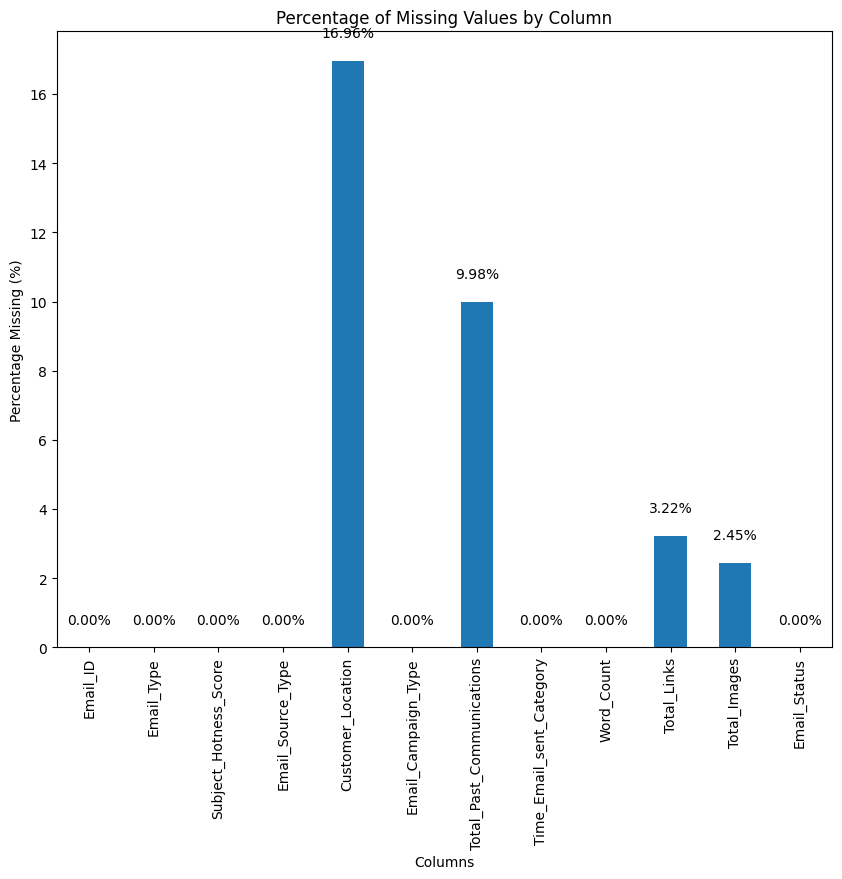

In [ ]:
# Visualizing the missing values

# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Plotting missing values as a bar plot
missing_percentage.plot(kind='bar', figsize=(10, 8))
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')

for index, value in enumerate(missing_percentage):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='top')

plt.show()


### What did you know about your dataset?

The dataset comprises essential features related to email campaigns, such as Email_Type, Subject_Hotness_Score, Email_Source_Type, Customer_Location, Email_Campaign_Type, Total_Past_Communications, Time_Email_sent_Category, Word_Count, Total_Links, Total_Images, and Email_Status. These features offer insights into the characteristics of each email and its associated metadata, serving as valuable predictors for campaign effectiveness.

**Rows and Columns:**

The dataset contains 68353 rows (entries) and 12 columns (features).

**Column Information:**

*   Email_ID: Identifier for each email (non-null for all entries).
*   Email_Type: Categorical feature represented as an integer
*   Subject_Hotness_Score: Numerical feature represented as a float.
*   Email_Source_Type: Categorical feature represented as an integer.
*   Customer_Location: Categorical feature representing customer location .
*   Email_Campaign_Type: Categorical feature represented as an integer .
*   Total_Past_Communications: Numerical feature representing total past communications .
*   Time_Email_sent_Category: Categorical feature represented as an integer .
*   Word_Count: Numerical feature representing the word count .
*   Total_Links: Numerical feature representing total links .
*   Total_Images: Numerical feature representing total images .
*   Email_Status: Target variable indicating email status .

**Missing Values:**

The dataset contains missing values in several columns:

*   Customer_Location: Missing values in 11595 entries (~17% missing).
*   Total_Past_Communications: Missing values in 6825 entries (~10% missing).
*   Total_Links: Missing values in 2201 entries (~3.2% missing).
*   Total_Images: Missing values in 1677 entries (~2.5% missing).





## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
# Dataset Describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Email_Type,68353.0,1.285094,0.451462,1.0,1.0,1.0,2.0,2.0
Subject_Hotness_Score,68353.0,1.095481,0.997578,0.0,0.2,0.8,1.8,5.0
Email_Source_Type,68353.0,1.456513,0.498109,1.0,1.0,1.0,2.0,2.0
Email_Campaign_Type,68353.0,2.272234,0.468680,1.0,2.0,2.0,3.0,3.0
Total_Past_Communications,61528.0,28.933250,12.536518,0.0,20.0,28.0,38.0,67.0
Time_Email_sent_Category,68353.0,1.999298,0.631103,1.0,2.0,2.0,2.0,3.0
Word_Count,68353.0,699.931751,271.719440,40.0,521.0,694.0,880.0,1316.0
Total_Links,66152.0,10.429526,6.383270,1.0,6.0,9.0,14.0,49.0
Total_Images,66676.0,3.550678,5.596983,0.0,0.0,0.0,5.0,45.0
Email_Status,68353.0,0.230934,0.497032,0.0,0.0,0.0,0.0,2.0


### Variables Description

*   **Email_Type:**
Description: Categorical variable representing the type or category of email.

Range: Values indicating different types/categories of emails, potentially encoded as integers (e.g., 1 for type A, 2 for type B).
*   **Subject_Hotness_Score:**

Description: Numerical variable indicating the perceived 'hotness' or attractiveness of the email subject.

Range: Float values ranging from 0.0 to 5.0, possibly reflecting a score assigned based on the subject's appeal.
*   **Email_Source_Type:**

Description: Categorical variable denoting the source or origin of the email.

Range: Different categories or sources of emails, represented by integers (e.g., 1 for source X, 2 for source Y).

*   **Email_Campaign_Type**:

Description: Categorical variable representing the type or category of the email campaign.

Range: Different types or categories of email campaigns, encoded as integers (e.g., 1 for campaign type A, 2 for type B).

*   **Total_Past_Communications:**

Description: Numerical variable indicating the total number of past communications or interactions.

Range: Integer values denoting the count of past communications, potentially representing engagements or interactions with customers.
*   **Time_Email_sent_Category:**

Description: Categorical variable representing the category of time when the email was sent.

Range: Categories or time slots during which emails were sent, encoded as integers (e.g., 1 for morning, 2 for afternoon).

*   **Word_Count:**

Description: Numerical variable representing the word count in the email content.

Range: Integer values indicating the number of words in the email content.

*   **Total_Links:**

Description: Numerical variable denoting the total number of links included in the email.

Range: Integer values representing the count of links present in the email content.

*   **Total_Images:**

Description: Numerical variable indicating the total number of images embedded in the email.

Range: Integer values representing the count of images included in the email content.
*   **Email_Status:**

Description: Categorical variable indicating the status or response to the email.

Range: Different categories representing email statuses (0 for not read, 1 for
read, 2 for acknowledged).



>
These descriptions provide an overview of the variables present in the dataset, their potential nature (categorical or numerical), and the ranges of values they encompass. Understanding these variables helps in interpreting and analyzing the data effectively for various business or analytical purposes.Answer Here



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for '{column}': {unique_values}\n")

Unique values for 'Email_ID': ['EMA00081000034500' 'EMA00081000045360' 'EMA00081000066290' ...
 'EMA00089998436500' 'EMA00089999168800' 'EMA00089999316900']

Unique values for 'Email_Type': [1 2]

Unique values for 'Subject_Hotness_Score': [2.2 2.1 0.1 3.  0.  1.5 3.2 0.7 2.  0.5 0.2 1.  4.  1.9 1.1 1.6 0.3 2.3
 1.4 1.7 2.8 1.2 0.8 0.6 4.2 1.8 2.4 0.9 1.3 3.3 2.6 3.1 4.1 2.9 2.7 0.4
 3.5 3.7 2.5 3.8 3.9 3.4 4.6 4.5 3.6 4.4 4.7 5.  4.3 4.8 4.9]

Unique values for 'Email_Source_Type': [2 1]

Unique values for 'Customer_Location': ['E' nan 'B' 'C' 'G' 'D' 'F' 'A']

Unique values for 'Email_Campaign_Type': [2 3 1]

Unique values for 'Total_Past_Communications': [33. 15. 36. 25. 18. nan 34. 21. 40. 27. 24. 42. 11. 23. 37. 35. 51.  9.
 39. 31. 50. 30. 14. 45. 53. 28.  7. 38. 52. 22. 43. 12. 16. 20. 41. 56.
 26. 29.  5. 32. 44. 10. 17. 46. 47. 48.  8. 49. 13.  0.  6. 55. 19. 60.
 59. 61. 54. 62. 57. 64. 58. 65. 66. 67. 63.]

Unique values for 'Time_Email_sent_Category': [1 2 3]

Unique values

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Before Imputation Statistics
original_mean = data['Total_Past_Communications'].mean()
original_mode = data['Total_Past_Communications'].mode()[0]
original_median = data['Total_Past_Communications'].median()

# Impute missing values with mean, mode, and median
mean_val = data['Total_Past_Communications'].mean()
mode_val = data['Total_Past_Communications'].mode()[0]
median_val = data['Total_Past_Communications'].median()

data_mean = data.copy()
data_mode = data.copy()
data_median = data.copy()

data_mean['Total_Past_Communications'].fillna(mean_val, inplace=True)
data_mode['Total_Past_Communications'].fillna(mode_val, inplace=True)
data_median['Total_Past_Communications'].fillna(median_val, inplace=True)

# After Imputation Statistics
mean_after = data_mean['Total_Past_Communications'].mean()
mode_after = data_mode['Total_Past_Communications'].mode()[0]
median_after = data_median['Total_Past_Communications'].median()

# Comparison of statistics
print("Original Statistics:")
print(f"Mean: {original_mean}, Mode: {original_mode}, Median: {original_median}")
print("\nStatistics after Mean Replacement:")
print(f"Mean: {mean_after}, Mode: {mode_after}, Median: {median_after}")


Original Statistics:
Mean: 28.93324990248342, Mode: 30.0, Median: 28.0

Statistics after Mean Replacement:
Mean: 28.93324990248342, Mode: 30.0, Median: 28.0


In [ ]:
mean_Total_Past_Communications = data['Total_Past_Communications'].mean()
data['Total_Past_Communications'].fillna(mean_Total_Past_Communications, inplace=True)

In [ ]:
data.dropna(subset=['Customer_Location'], inplace=True)

In [ ]:
median_total_images = data['Total_Images'].median()
data['Total_Images'].fillna(median_total_images, inplace=True)

In [ ]:
# Predictive analysis on Total_Links columns to check if it is applicable for replacing null values or not

from sklearn.linear_model import LinearRegression

df_imputed = data.copy()

# Separate the dataset into two parts: one with missing values and one without
df_missing = df_imputed[df_imputed['Total_Links'].isnull()]
df_not_missing = df_imputed[~df_imputed['Total_Links'].isnull()]

# Choose features for predictive imputation (using other columns as predictors)
# For example, you can use 'Email_Type', 'Subject_Hotness_Score', 'Word_Count' as predictors
# Select relevant features and target column for Total_Links
predictors = ['Email_Type', 'Subject_Hotness_Score', 'Word_Count']
target = 'Total_Links'

# Split the dataset into X (features) and y (target)
X = df_not_missing[predictors]
y = df_not_missing[target]

# Initialize a regression model (you can use any other model suitable for regression)
model = LinearRegression()

# Fit the model on non-missing values to predict the missing values
model.fit(X, y)

# Use the trained model to predict missing values
imputed_values = model.predict(df_missing[predictors])

# Fill in the missing values in the DataFrame with the predicted values
df_imputed.loc[df_imputed['Total_Links'].isnull(), 'Total_Links'] = imputed_values


Original Summary Statistics:
count    54954.000000
mean        10.422899
std          6.373423
min          1.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         49.000000
Name: Total_Links, dtype: float64

Imputed Summary Statistics:
count    56758.000000
mean        10.424419
std          6.275018
min          1.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         49.000000
Name: Total_Links, dtype: float64


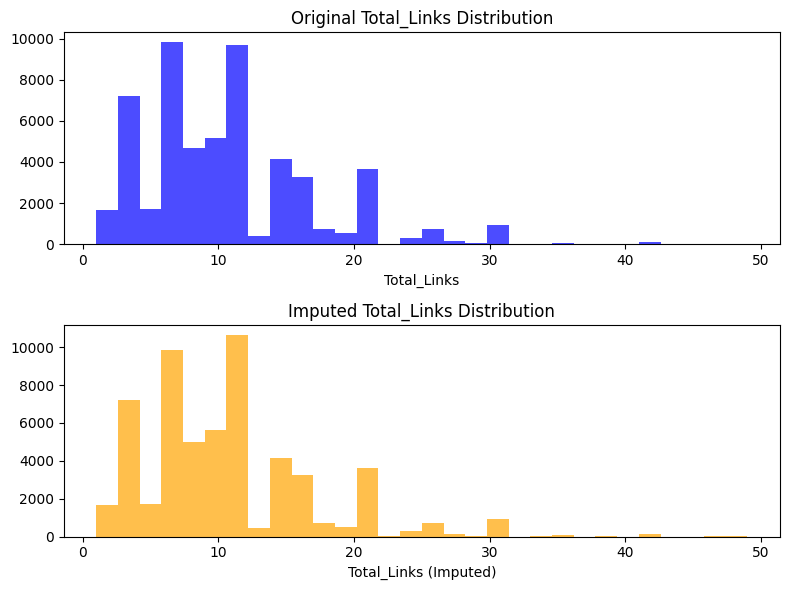

In [ ]:
# Calculate summary statistics before and after imputation for 'Total_Links'
original_stats = data['Total_Links'].describe()
imputed_stats = df_imputed['Total_Links'].describe()

# Print summary statistics
print("Original Summary Statistics:")
print(original_stats)
print("\nImputed Summary Statistics:")
print(imputed_stats)

# Create a comparison plot for 'Total_Links'
plt.figure(figsize=(8, 6))

plt.subplot(2, 1, 1)
plt.title('Original Total_Links Distribution')
plt.hist(data['Total_Links'].dropna(), bins=30, color='blue', alpha=0.7)
plt.xlabel('Total_Links')
plt.subplot(2, 1, 2)
plt.title('Imputed Total_Links Distribution')
plt.hist(df_imputed['Total_Links'], bins=30, color='orange', alpha=0.7)
plt.xlabel('Total_Links (Imputed)')

plt.tight_layout()
plt.show()

As we can see, trained model accurataly predicted missing values in the Total_Links column based on the selected predictors, I replaced null with imputed values.

In [ ]:
data['Total_Links'] = df_imputed['Total_Links']

In [ ]:
data.isnull().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

### What all manipulations have you done and insights you found?



*   As 'Email_Type', 'Subject_Hotness_Score','Email_Campaign_Type','Time_Email_sent_Category', 'Word_Count','Email_Status' has single value an nan, i drop that null value as single value won't affect the dataset predictions.

*   As the missing values constitute a relatively significant percentage (around 17%) of the entries, dropping might result in a significant loss of data.But the column is not critical for analysis so I dropped the missing values.

*    The imputation process in 'Total_Links' column resulted in an increase in the count without significantly altering the central tendency (mean, median) or the spread (percentiles, max) of the 'Total_Links' column. This suggests that the imputation maintained the basic statistical characteristics of the column.


*   The median imputation process in 'Total_images' columns resulted in no subtle change in values

*   The mean imputation process in 'Total_Past_Communications' columns resulted in no subtle change in values
   







## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 What is the distribution of different types of emails (Email_Type) in the dataset

In [ ]:
# Filter the DataFrame for each email type separately
email_type_1 = data[data['Email_Type'] == 1]
email_type_2 = data[data['Email_Type'] == 2]

# Print counts for each email type separately
print("Counts for Email Type 1:")
print(email_type_1['Email_Type'].value_counts())

print("\nCounts for Email Type 2:")
print(email_type_2['Email_Type'].value_counts())


Counts for Email Type 1:
1    40527
Name: Email_Type, dtype: int64

Counts for Email Type 2:
2    16231
Name: Email_Type, dtype: int64


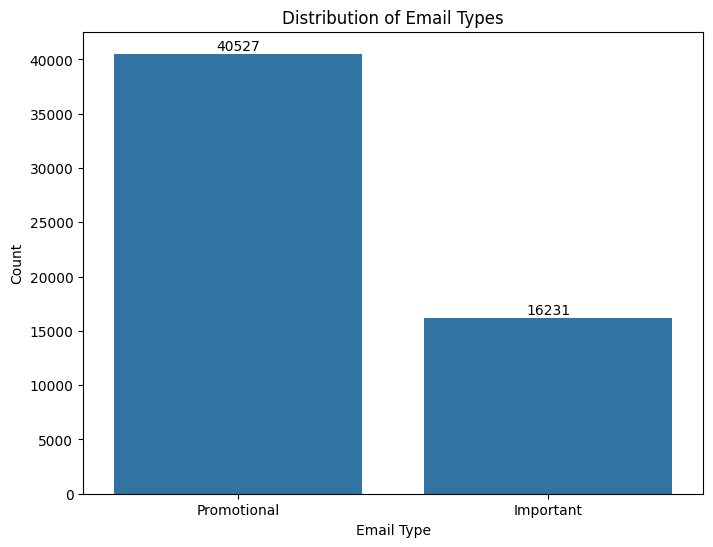

In [ ]:
data_copy = data.copy()

# Mapping categories to labels
email_type_labels = {1: 'Promotional', 2: 'Important'}
data_copy['Email_Type'] = data_copy['Email_Type'].map(email_type_labels)

# Calculate counts for Email Type
email_type_counts = data['Email_Type'].value_counts()


# Plotting the countplot with specified colors
plt.figure(figsize=(8, 6))
sns.countplot(data=data_copy, x='Email_Type')

# Adding count annotations on top of the bars
for index, value in enumerate(data['Email_Type'].value_counts()):
    plt.text(index, value + 1, f'{value}', ha='center', va='bottom')

plt.title('Distribution of Email Types')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.show()



##### 1. Why did you pick the specific chart?

The choice of a countplot chart for the relationship between Email_Type and Email_Status depends on the nature of the data and the goal of the analysis.

A countplot is suitable when you want to visualize the count of observations in each category. In this case, it allows you to see the distribution of different Email_Types and further breaks down those counts by Email_Status.



##### 2. What is/are the insight(s) found from the chart?

The email_type has 2 types, email_type 1 and email_type 2. consider them as like promotional email or important email.

*   Overall in the distribution Email_type 1(promotional email) has higher count than Email_type 2(important email).
*   Email_type 1 has 40527 and Email_type 2 has 16231 counts.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can influence decision-making regarding resource allocation, campaign strategies, content creation, and targeting approaches in email marketing. Understanding which email types perform better and their distribution can lead to optimizations that increase the likelihood of achieving the desired outcomes, ultimately contributing to a positive business impact by improving email campaign effectiveness and engagement with recipients.

#### Chart - 2: How does the effectiveness (Email_Status) vary across email types?

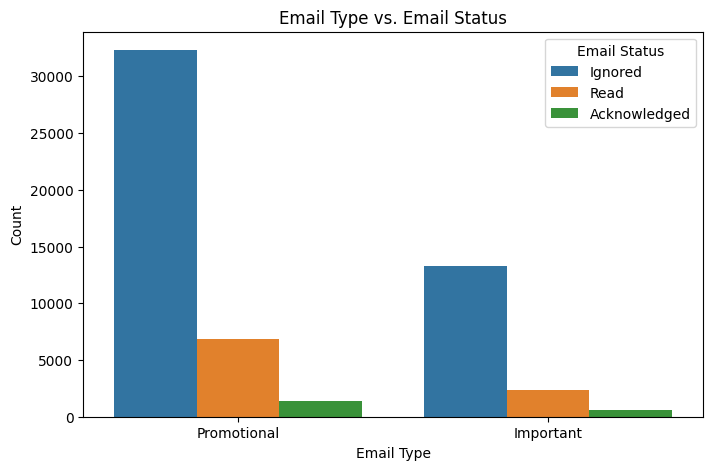

In [ ]:
# Mapping categories to labels
email_status_labels = {0: 'Ignored', 1: 'Read', 2: 'Acknowledged'}

# Calculate counts for Email Status
email_status_counts = data['Email_Status'].value_counts()
data_copy['Email_Status'] = data_copy['Email_Status'].map(email_status_labels)

# Calculate counts for combinations of Email Type and Email Status
type_status_counts = data_copy.groupby(['Email_Type', 'Email_Status']).size().reset_index(name='Count')

# Email Type vs. Email Status
plt.figure(figsize=(8, 5))
sns.countplot(data=data_copy, x='Email_Type', hue='Email_Status')

plt.title('Email Type vs. Email Status')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.legend(title='Email Status')
plt.show()


##### 1. Why did you pick the specific chart?

The choice of a countplot chart for the relationship between Email_Type and Email_Status depends on the nature of the data and the goal of the analysis.

A countplot is suitable when you want to visualize the count of observations in each category. In this case, it allows you to see the distribution of different Email_Types and further breaks down those counts by Email_Status.

##### 2. What is/are the insight(s) found from the chart?

Email_Status is the target variable which contains the characterization of the mail that is ignored, read, and acknowledged by the reader denoted by 0, 1, 2 respectively in dataset.
*  The ignored email_status count is much higher in both promotional and important email types.  
*   Similarly count of acknowledged is very less.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can influence decision-making regarding resource allocation, campaign strategies, content creation, and targeting approaches in email marketing. Understanding which email types perform better and their distribution can lead to optimizations that increase the likelihood of achieving the desired outcomes, ultimately contributing to a positive business impact by improving email campaign effectiveness and engagement with recipients.Answer Here

#### Chart - 3: What is the range and distribution of subject hotness scores (Subject_Hotness_Score)?

In [ ]:
# Calculating frequency count for Subject Hotness Scores
subject_hotness_counts = data['Subject_Hotness_Score'].value_counts().sort_index()
print(subject_hotness_counts)

0.0    4485
0.1    5020
0.2    5297
0.3    5743
0.4    1657
0.5    1652
0.6    1612
0.7    1626
0.8    1591
0.9    1411
1.0    1462
1.1    1397
1.2    1572
1.3    1642
1.4    1579
1.5    1647
1.6    1601
1.7    1477
1.8    1395
1.9    1273
2.0    1274
2.1    1153
2.2    1097
2.3     997
2.4     774
2.5     696
2.6     671
2.7     615
2.8     547
2.9     477
3.0     476
3.1     447
3.2     422
3.3     352
3.4     282
3.5     246
3.6     214
3.7     160
3.8     155
3.9     120
4.0     102
4.1      82
4.2      65
4.3      50
4.4      42
4.5      24
4.6      24
4.7      20
4.8      18
4.9       9
5.0       8
Name: Subject_Hotness_Score, dtype: int64


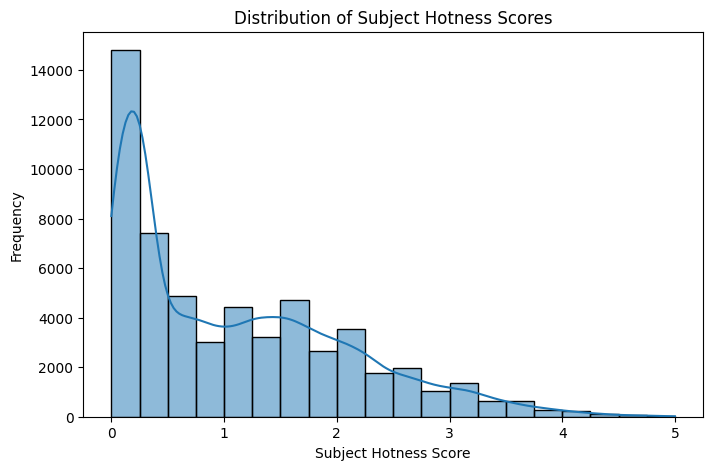

In [ ]:
# Distribution of Subject Hotness Scores
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Subject_Hotness_Score', bins=20, kde=True)
plt.title('Distribution of Subject Hotness Scores')
plt.xlabel('Subject Hotness Score')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Given the nature of the 'Subject Hotness Scores' as a continuous variable and the need to understand its distribution and frequency across different score ranges, a histogram is a suitable visualization tool for gaining insights into the distribution pattern of this particular dataset.

##### 2. What is/are the insight(s) found from the chart?

Subject_Hotness_Score is email effectiveness score.

*   Subject Hotness Scores Range: The scores range from 0.0 to 5.0, showing a diverse range of subject hotness in the emails analyzed.
*   Concentration of Scores: Scores between 0.0 and 2.0 appear to have higher frequencies, with a gradual decrease in frequency as the score increases.
*   Higher Frequency Peaks: There are several peaks in frequency at certain score intervals (0.0, 0.1, 0.2, 0.3, 1.3, 1.5, 2.0) indicating higher occurrences or concentrations of emails within these hotness score ranges.
*   Decreasing Frequency: As the score moves towards higher values (from around 2.0 to 5.0), the frequency sharply declines, indicating fewer emails in the dataset with higher hotness scores.
*   Skewed Distribution: The distribution appears right-skewed or negatively skewed, with more emails concentrated towards lower subject hotness scores and fewer emails having higher scores.
*   Subject Hotness Score Distribution Variance: Scores between 0.0 and 1.5 seem to have relatively higher variability, as evidenced by the fluctuations in frequency counts within this range.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gleaned from subject hotness scores provide valuable information to enhance email campaigns and engagement, certain patterns (such as the skewed distribution towards lower scores and declining frequency with higher scores) might highlight areas where improvements in content and strategy are needed to avoid potential negative impacts on campaign effectiveness and audience engagement. Adjusting strategies to strike a balance between improving lower-scoring emails and creating more compelling content for higher-scoring emails can positively impact business growth.

#### Chart - 4: How does Subject_Hotness_Score correlate with the Email_Status?

In [ ]:
# Counting values for 'Subject Hotness Score' across different 'Email Status'
# Grouping by 'Email Status' and describing 'Subject Hotness Score'
score_stats = data_copy.groupby('Email_Status')['Subject_Hotness_Score'].describe()

# Printing count of values and identifying outliers
print("Subject Hotness Score' across different 'Email Status:")
score_stats

Subject Hotness Score' across different 'Email Status:


,count,mean,std,min,25%,50%,75%,max
Email_Status,,,,,,,,
Acknowledged,1977.0,0.490794,0.671594,0.0,0.1,0.2,0.6,3.8
Ignored,45590.0,1.160145,0.987982,0.0,0.3,1.0,1.8,5.0
Read,9191.0,0.905353,1.032402,0.0,0.1,0.3,1.5,5.0


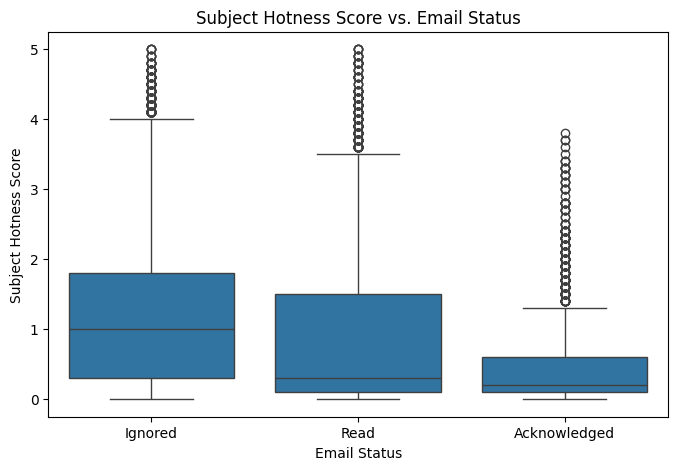

In [ ]:
# Subject Hotness Score vs. Email Status
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_copy, x='Email_Status', y='Subject_Hotness_Score')
plt.title('Subject Hotness Score vs. Email Status')
plt.xlabel('Email Status')
plt.ylabel('Subject Hotness Score')
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot is an effective visualization technique for understanding how 'Subject Hotness Scores' vary across different 'Email Status' categories. It provides a clear and concise representation of the distribution, central tendency, variability, and outliers of the continuous variable within each categorical group, facilitating comparative analysis and insights across these categories.

##### 2. What is/are the insight(s) found from the chart?

*   The information indicates the sample size or count of 'Subject Hotness Score' data available for each email status category.There are 45,590 observations for Email_Status 0.There are 9,191 observations for Email_Status 1.There are 1,977 observations for Email_Status 2.

*   Mean Subject Hotness Score suggests the average perceived hotness score for the subject lines in different email status categories. Lower scores indicate lower perceived hotness. The mean 'Subject Hotness Score' for Email_Status 2 is about 0.49 which is lower than Email_Status 0 and Email_Status 1.

*   A higher standard deviation implies higher variability or dispersion of 'Subject Hotness Scores' within each email status category. Email_Status 1 has higher variability with standard deviation is around 1.03.


*   The minimum 'Subject Hotness Score' observed across all email statuses is 0.0, while the maximum score is 5.0.


*   The spread of 'Subject Hotness Scores' and the concentration of scores within each quartile range for different email statuses are as follows:

 For Email_Status 0: 25% of the scores fall below 0.3, 50% below 1.0 (median), and 75% below 1.8.

For Email_Status 1: 25% of the scores fall below 0.1, 50% below 0.3 (median), and 75% below 1.5.

For Email_Status 2: 25% of the scores fall below 0.1, 50% below 0.2 (median), and 75% below 0.6.












##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, insights from the boxplot visualization can help optimize email marketing strategies by highlighting areas for improvement and identifying outliers for learning opportunities, consistent low subject hotness scores or a lack of variation might pose challenges and potentially hinder positive growth by impacting engagement rates and campaign effectiveness. Addressing these insights by refining email content and targeting strategies can lead to positive business impacts by enhancing engagement and customer interaction.

#### Chart - 5: Email Source Type vs. Email Campaign Type

In [ ]:
# Mapping categories to labels
source_type_labels = {1: 'Marketing', 2: 'Important'}
campaign_type_labels = {1: 'Type A', 2: 'Type B', 3: 'Type C'}

data_copy['Email_Source_Type'] = data_copy['Email_Source_Type'].map(source_type_labels)
data_copy['Email_Campaign_Type'] = data_copy['Email_Campaign_Type'].map(campaign_type_labels)
data_copy['Email_Status'] = data_copy['Email_Status'].map(email_status_labels)
source_type_counts = data_copy.groupby(['Email_Source_Type', 'Email_Campaign_Type']).size().reset_index(name='Count')
source_type_counts

,Email_Source_Type,Email_Campaign_Type,Count
0,Important,Type A,300
1,Important,Type B,17707
2,Important,Type C,7886
3,Marketing,Type A,295
4,Marketing,Type B,22330
5,Marketing,Type C,8240


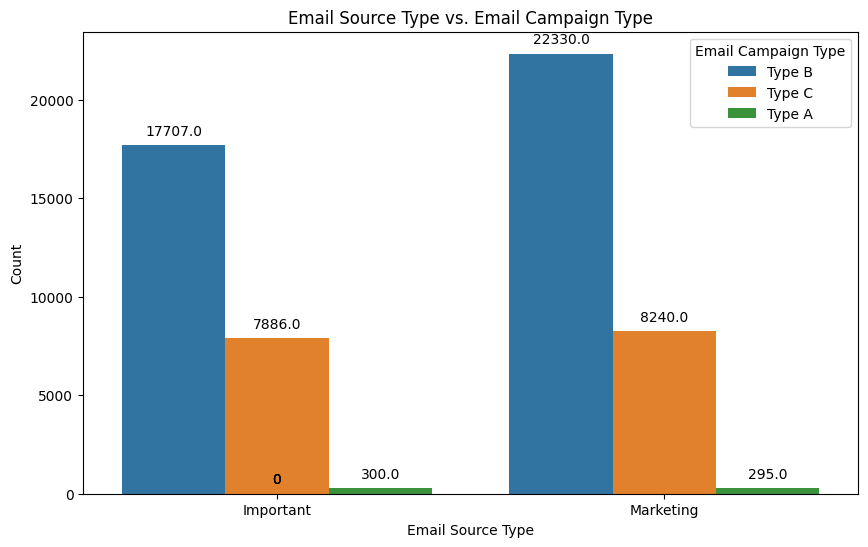

In [ ]:
# Creating the countplot
plt.figure(figsize=(10, 6))
countplot = sns.countplot(data=data_copy, x='Email_Source_Type', hue='Email_Campaign_Type')

# Adding count annotations on top of the bars
for p in countplot.patches:
    countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Email Source Type vs. Email Campaign Type')
plt.xlabel('Email Source Type')
plt.ylabel('Count')
plt.legend(title='Email Campaign Type')
plt.show()

##### 1. Why did you pick the specific chart?

Countplot type is chosen to visualize and compare the distribution of 'Email Campaign Types' across various 'Email Source Types' in a clear and concise manner. It enables the identification of patterns, frequencies, and relationships between these categorical variables, providing valuable insights into how different campaigns are associated with distinct email source types.

##### 2. What is/are the insight(s) found from the chart?



*   Higher Occurrence of 'Email_Campaign_Type' 2: Across both 'Email_Source_Type' 1 and 2, 'Email_Campaign_Type' 2 has notably higher counts compared to other campaign types. Specifically, for 'Email_Source_Type' 1, 'Email_Campaign_Type' 2 has a significantly higher count (22,330) than the other campaign types. Similarly, for 'Email_Source_Type' 2, 'Email_Campaign_Type' 2 also leads in count (17,707).

*   'Email_Source_Type' 1 has more variation in Campaign Types: 'Email_Source_Type' 1 seems to have a more even distribution among the three campaign types compared to 'Email_Source_Type' 2. 'Email_Source_Type' 1 has counts spread across all three campaign types, albeit with 'Email_Campaign_Type' 2 having the highest count.

*  'Email_Source_Type' 2 has a dominant 'Email_Campaign_Type' 2: While 'Email_Source_Type' 2 has a slightly lower total count than 'Email_Source_Type' 1, it is notably dominated by 'Email_Campaign_Type' 2, which has a significantly higher count compared to the other campaign types within this source type.

In summary, the analysis of the chart indicates that 'Email_Campaign_Type' 2 is generally more prevalent across both 'Email_Source_Type' categories. Additionally, 'Email_Source_Type' 1 shows more diversity across campaign types compared to 'Email_Source_Type' 2, where 'Email_Campaign_Type' 2 is notably dominant.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The insights indicate a strong presence of 'Email_Campaign_Type' 2 and offer directions for optimization, a balanced approach is necessary. Exploring and understanding why certain types perform better or vary across source types is critical. It's essential to avoid over-focusing on one successful aspect and instead use these insights to refine strategies, enhance targeted marketing efforts, and diversify campaigns for sustained growth and adaptability.

#### Chart - 6: Email Source Type vs. Email Status

In [ ]:
data_copy = data.copy()
# Mapping categories to labels
source_type_labels = {1: 'Marketing', 2: 'Important'}
email_status_labels = {0: 'Ignored', 1: 'Read', 2: 'Acknowledged'}

data_copy['Email_Status'] = data_copy['Email_Status'].map(email_status_labels)
data_copy['Email_Source_Type'] = data_copy['Email_Source_Type'].map(source_type_labels)
source_type_counts1 = data_copy.groupby(['Email_Source_Type', 'Email_Status']).size().reset_index(name='Count')
source_type_counts1

,Email_Source_Type,Email_Status,Count
0,Important,Acknowledged,780
1,Important,Ignored,21004
2,Important,Read,4109
3,Marketing,Acknowledged,1197
4,Marketing,Ignored,24586
5,Marketing,Read,5082


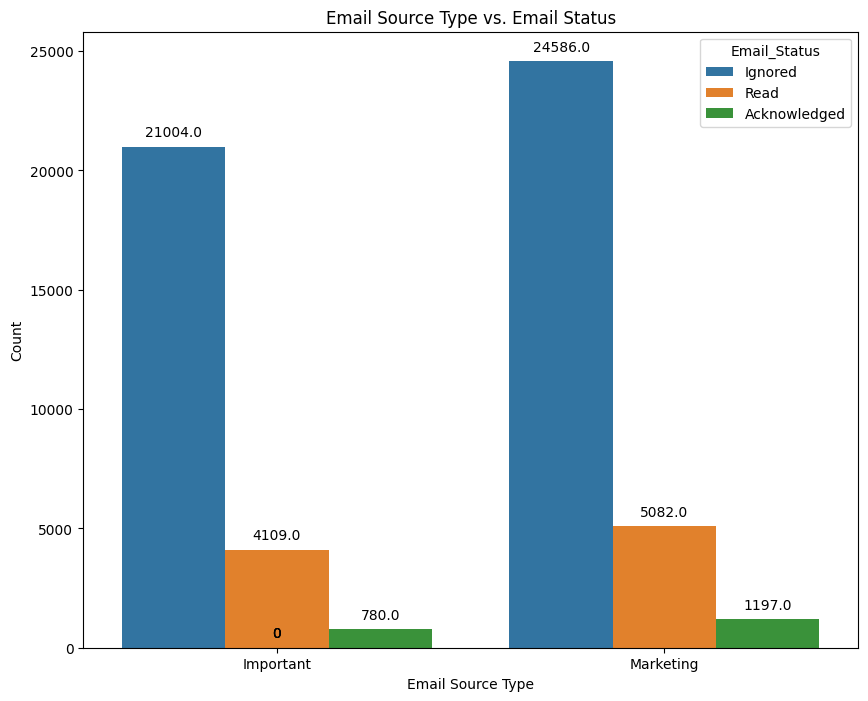

In [ ]:
# Email Source Type vs. Email Status

# Creating the countplot
plt.figure(figsize=(10, 8))
countplot = sns.countplot(data=data_copy, x='Email_Source_Type', hue='Email_Status')

# Adding count annotations on top of the bars
for p in countplot.patches:
    countplot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Email Source Type vs. Email Status')
plt.xlabel('Email Source Type')
plt.ylabel('Count')
plt.legend(title = 'Email_Status')
plt.show()

##### 1. Why did you pick the specific chart?

A countplot for 'Email Source Type' vs. 'Email Status' could be useful to visualize the distribution of email statuses based on different email source types. This type of visualization can provide insights into how different sources contribute to the overall distribution of email statuses, such as whether certain source types tend to generate more successful deliveries, bounces, opens, clicks, or other status categories.

##### 2. What is/are the insight(s) found from the chart?

The insights now clarify that a significant number of emails are being ignored across both source types, but there might be more opportunities for engagement or response with recipients from 'Email_Source_Type' 1. This understanding could guide strategies aimed at reducing the ignored rates and improving overall engagement with email campaigns.

*   High Ignored Rates: Both 'Email_Source_Type' 1 and 'Email_Source_Type' 2 demonstrate considerably high counts in the 'Ignored (0)' status, indicating a significant proportion of emails are being disregarded or not engaged with by recipients.

*  Differential Engagement: 'Email_Source_Type' 1 continues to exhibit relatively higher counts in 'Read (1)' and 'Acknowledged (2)' compared to 'Email_Source_Type' 2, implying a potentially more engaged audience or better-crafted emails that prompt interaction beyond just reading.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The gained insights from the analysis of 'Email_Source_Type' versus 'Email_Status' can indeed help in creating a positive business impact by guiding strategies to enhance email campaign effectiveness.

The insights offer valuable directions for optimization, neglecting to address the persistently high 'Ignored (0)' rates and the lack of engagement variance in 'Email_Source_Type' 2 might lead to negative growth. By implementing strategies to reduce ignored rates and enhance engagement across different source types, businesses can leverage these insights for positive growth and improved email campaign performance.

#### Chart - 7: Customer Location vs. Email Status

In [ ]:
# Calculating count of 'Email Status' across different 'Customer Location' categories
email_status_by_location = data_copy.groupby('Customer_Location')['Email_Status'].value_counts().unstack().fillna(0)
print(email_status_by_location)

Email_Status       Acknowledged  Ignored  Read
Customer_Location                             
A                            49     1160   245
B                           125     3502   714
C                           214     4654   890
D                           250     5950  1206
E                           364     8136  1693
F                           156     3579   698
G                           819    18609  3745


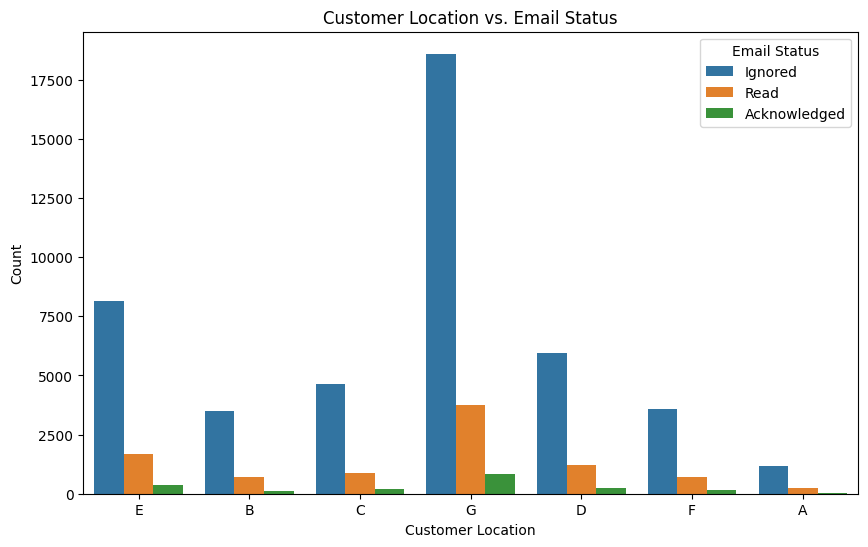

In [ ]:
# Customer Location vs. Email Status
plt.figure(figsize=(10, 6))
sns.countplot(data=data_copy, x='Customer_Location', hue='Email_Status')
plt.title('Customer Location vs. Email Status')
plt.xlabel('Customer Location')
plt.ylabel('Count')
plt.legend(title='Email Status')
plt.show()

##### 1. Why did you pick the specific chart?

 The countplot with hue variation is chosen as it efficiently visualizes and compares the distribution of 'Email Statuses' across various 'Customer Locations,' making it easier to derive insights and identify patterns or variations in email statuses associated with different customer locations.

##### 2. What is/are the insight(s) found from the chart?


*   Varied Engagement Levels Across Locations: There's a clear difference in the distribution of email statuses across different customer locations.
Location G has notably higher counts in all statuses compared to other locations, indicating higher overall engagement or interaction with emails.
Location A shows the lowest counts across all statuses, suggesting comparatively lower engagement or response rates.

*  Consistent Patterns of Engagement: Generally, there's a consistent pattern across all locations where the count decreases from 'Ignored (0)' to 'Read (1)' and further to 'Acknowledged (2)'. This pattern implies a decreasing progression from lack of engagement ('Ignored') to higher levels of engagement ('Acknowledged').

*   Engagement Trend Across Locations: While the overall counts differ, the ratio of counts between different statuses remains relatively consistent across most locations. For instance, the ratio of 'Ignored' to 'Read' to 'Acknowledged' tends to follow a similar pattern across different locations.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The insights gained from the analysis of email statuses across different customer locations can potentially create a positive business impact if leveraged effectively.  The insights from the chart reveal varying levels of engagement across different customer locations and consistent patterns of engagement progression. Leveraging these insights can guide more targeted and location-specific strategies to improve overall engagement and campaign effectiveness. However, challenges exist in addressing consistently low-engagement locations and refining strategies for a more tailored approach.

#### Chart - 8: Time of Email Sent vs. Email Status


In [ ]:
time_category_labels = {1: 'Morning', 2: 'Evening', 3: 'Night'}

# Replace numeric categories with labels in the copy
data_copy['Time_Email_sent_Category'] = data_copy['Time_Email_sent_Category'].map(time_category_labels)

status_counts = data_copy.groupby(['Time_Email_sent_Category', 'Email_Status']).size().reset_index(name='Count')
status_counts

,Time_Email_sent_Category,Email_Status,Count
0,Evening,Acknowledged,1185
1,Evening,Ignored,27409
2,Evening,Read,5538
3,Morning,Acknowledged,412
4,Morning,Ignored,9135
5,Morning,Read,1807
6,Night,Acknowledged,380
7,Night,Ignored,9046
8,Night,Read,1846


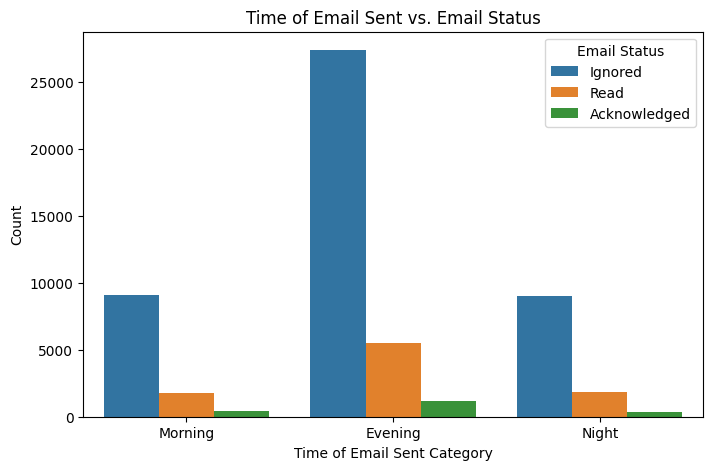

In [ ]:
# Plotting
plt.figure(figsize=(8, 5))
sns.countplot(data=data_copy, x='Time_Email_sent_Category', hue='Email_Status')

plt.title('Time of Email Sent vs. Email Status')
plt.xlabel('Time of Email Sent Category')
plt.ylabel('Count')
plt.legend(title='Email Status')
plt.show()

##### 1. Why did you pick the specific chart?

The countplot is creating a visualization that represents the count of observations in each category of 'Time_Email_sent_Category', differentiated by the three 'Email_Status' categories: 'Ignored (0)', 'Read (1)', and 'Acknowledged (2)'.

 This countplot visualization helps in understanding the distribution of email statuses across different time slots when the emails were sent. It provides insights into how email statuses ('Ignored (0)', 'Read (1)', 'Acknowledged (2)') vary concerning different time categories, allowing for analysis of potential patterns or trends in email engagement based on time slots.

##### 2. What is/are the insight(s) found from the chart?

 The insights highlight the varying engagement levels across different time

*   Engagement Patterns Across Time Categories:
1.   Evening: Shows the highest counts across all three statuses. It has the most significant counts for 'Ignored (0)', 'Read (1)', and 'Acknowledged (2)' compared to Morning and Night categories.
2.   Morning: Follows Evening in counts but generally displays lower engagement across all statuses compared to the Evening category.
3.   Night: Exhibits relatively lower engagement counts across all statuses compared to both Evening and Morning categories.

*   Consistent Engagement Ratio:

There's a consistent pattern across all time categories, with the counts progressively decreasing from 'Ignored (0)' to 'Read (1)' and further to 'Acknowledged (2)'. This trend indicates a general decrease in engagement levels as statuses move from ignored to read and acknowledged.


*   Relative Differences in Engagement:

Evening emails have the highest engagement across all statuses, indicating that this time slot might be more conducive to higher interaction or response rates compared to Morning and Night slots.

  The insights highlight the varying engagement levels across different time categories, with Evening showing the highest engagement. Leveraging this information to optimize campaigns during peak engagement times while adjusting strategies for lower-engagement periods can potentially improve overall engagement and campaign effectiveness.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the relationship between 'Time_Email_sent_Category' and 'Email_Status' can contribute to creating a positive business impact if used effectively.

Insights indicate the potential for optimization during Evening time slots, solely focusing on this may lead to neglecting other time categories and missing opportunities for varied audience engagement. A balanced approach, along with tailored strategies for different time slots, can help in leveraging these insights for positive growth by optimizing engagement across various segments.

#### Chart - 9: Word Count Distribution

In [ ]:
word_count_counts = data['Word_Count'].value_counts()

bins = 20
word_count_min = data['Word_Count'].min()
word_count_max = data['Word_Count'].max()
bin_width = (word_count_max - word_count_min) / bins

word_count_histogram = []
for i in range(bins):
    lower_bound = word_count_min + i * bin_width
    upper_bound = lower_bound + bin_width
    count = len(data[(data['Word_Count'] >= lower_bound) & (data['Word_Count'] < upper_bound)])
    print(i ," : ", count)
    word_count_histogram.append(count)

0  :  855
1  :  690
2  :  942
3  :  1588
4  :  1853
5  :  2824
6  :  3342
7  :  4289
8  :  5196
9  :  4859
10  :  7234
11  :  3742
12  :  4174
13  :  4021
14  :  2904
15  :  1519
16  :  2290
17  :  1603
18  :  1993
19  :  788


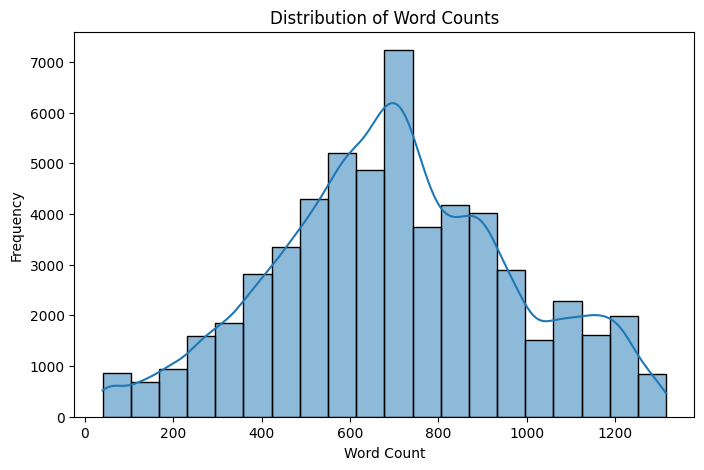

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Word_Count', bins=bins, kde=True)
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is commonly used to represent the frequency distribution of continuous or discrete numerical data. It displays the count or frequency of values falling within specific intervals, called bins. Each bar in the histogram represents the count of values within a particular range or bin.

##### 2. What is/are the insight(s) found from the chart?

Generate a histogram by counting the occurrences of word counts within specified bins. The code provided seems to divide the range of word counts into 20 bins and counts the number of occurrences falling into each bin.

 Iterated through 20 bins, calculating the count of occurrences within each bin range, and printing the counts for each bin. This approach attempts to  create a histogram by defining intervals and counting occurrences falling into those intervals.

 Analyzing the histogram of word counts provides a visual representation of the dataset's word count distribution, enabling insights into document lengths, distribution patterns, and potential strategies for handling texts of various lengths. These insights can be instrumental in content creation, text analytics, or any task involving understanding document lengths and their impact.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights from the word count histogram offer opportunities for optimization in content creation and audience engagement, it's essential to avoid overemphasis on specific ranges and maintain a balance between meeting audience preferences and delivering quality, relevant content. Strategic use of these insights, coupled with a focus on content quality and audience needs, can drive positive business impacts.

#### Chart - 10: Correlation Heatmap

<ipython-input-37-e6c4a0179962>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


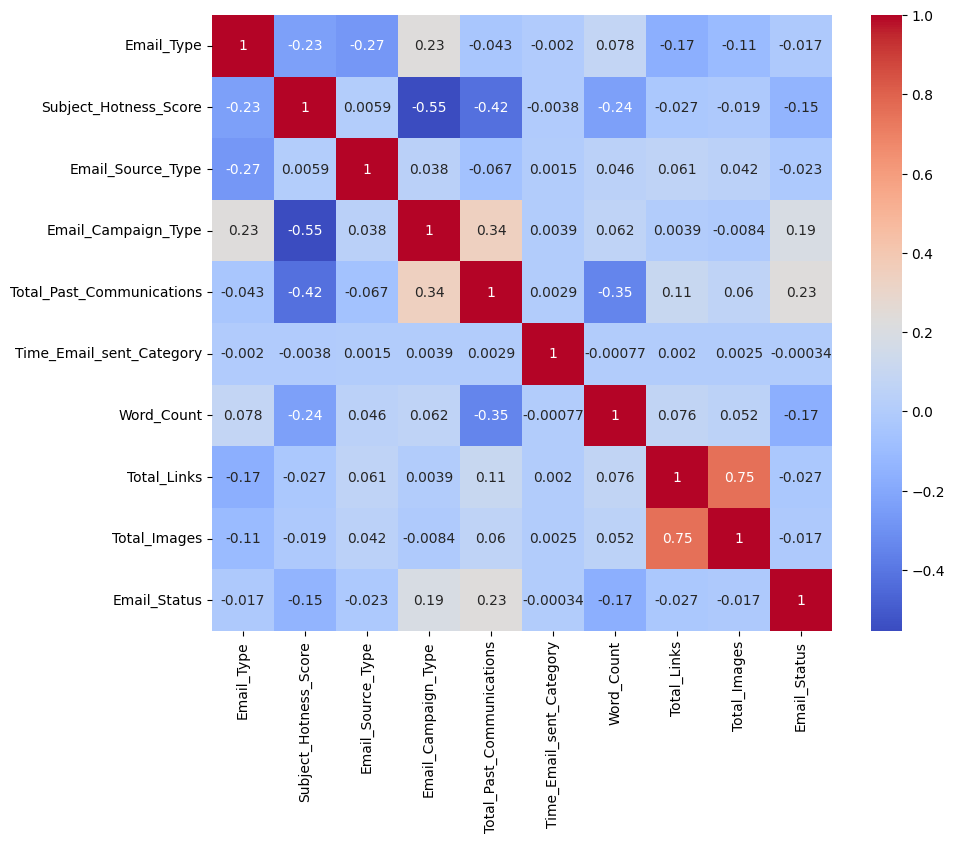

In [ ]:
# Explore correlations between features and target variable
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

 The heatmap of a correlation matrix is an effective and widely-used visualization tool to understand relationships between variables in a dataset. Its visual nature, ability to display correlation strengths, and ease of interpretation make it a popular choice for exploring and analyzing relationships among multiple variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?


*   **Strong Negative Correlations:**

Subject_Hotness_Score has a moderately strong negative correlation with Email_Campaign_Type (-0.558) and Word_Count (-0.241).
Total_Past_Communications has a moderate negative correlation with Subject_Hotness_Score (-0.428) and a weak negative correlation with Word_Count (-0.344).

*   **Moderate Positive Correlations:**

Total_Past_Communications shows a moderate positive correlation with Email_Campaign_Type (0.347).
Total_Links and Total_Images have a relatively strong positive correlation (0.755).

*   **Weak Correlations:**

Several pairs of variables show weak or negligible correlations (close to 0).

*   **Correlation with the Target Variable (Email_Status):**

Email_Campaign_Type (0.199) and Total_Past_Communications (0.235) exhibit some positive correlation with the target variable (Email_Status).

#### Chart - 15 - Pair Plot

In [ ]:
columns_of_interest = ['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
                       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
                       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
                       'Email_Status']

data_subset = data[columns_of_interest]

# Creating the pair plot
sns.pairplot(data_subset, hue='Email_Status', palette='viridis')
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot will showcase scatterplots for each pairwise combination of numerical columns and histograms for the individual columns along the diagonal. The color differentiation based on 'Email_Status' will help visualize how different email statuses are distributed or correlated across various combinations of variables. Adjust the code or parameters according to your analysis goals or visual preferences.

##### 2. What is/are the insight(s) found from the chart?

The pair plot will showcase scatterplots for each pairwise combination of numerical columns and histograms for the individual columns along the diagonal. The color differentiation based on 'Email_Status' will help visualize how different email statuses are distributed or correlated across various combinations of variables. Adjust the code or parameters according to your analysis goals or visual preferences.

Skipping Email_ID as it contains non-numeric data.


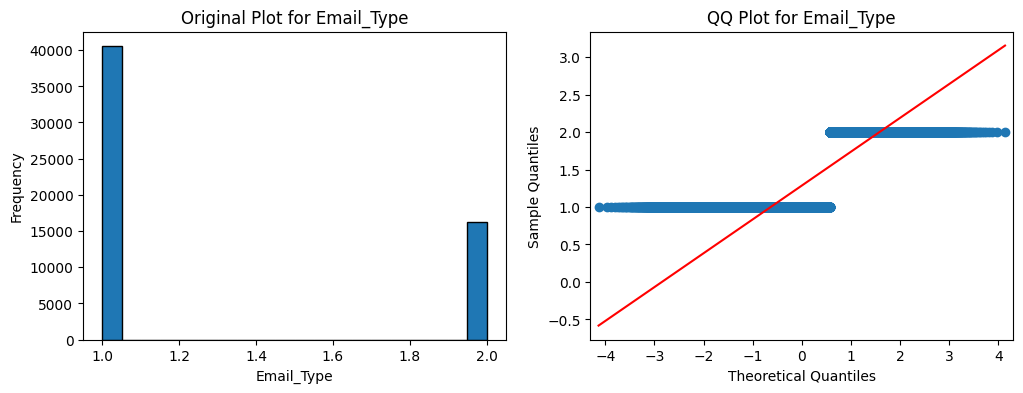

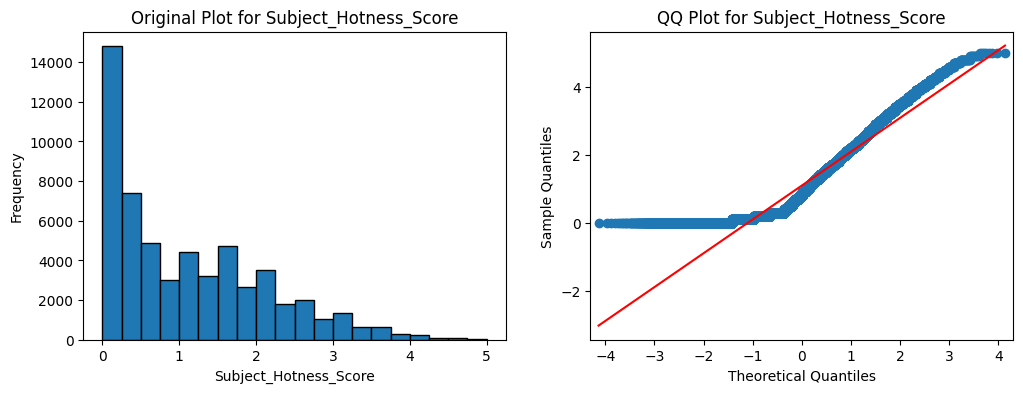

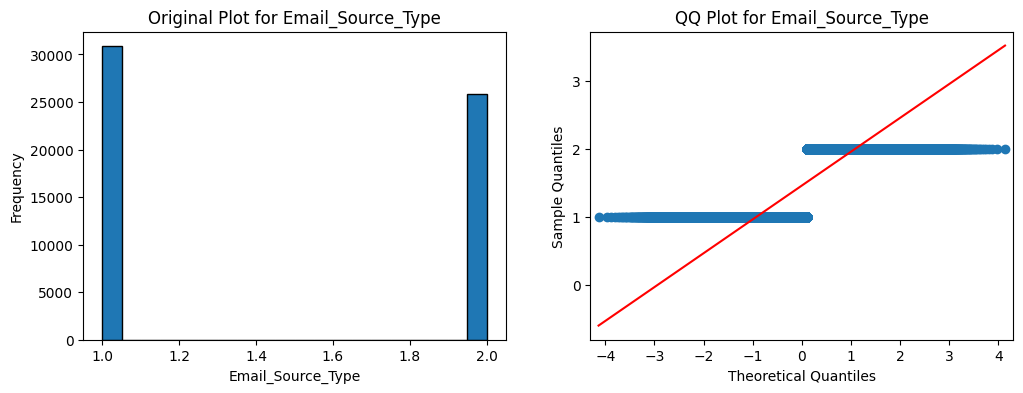

Skipping Customer_Location as it contains non-numeric data.


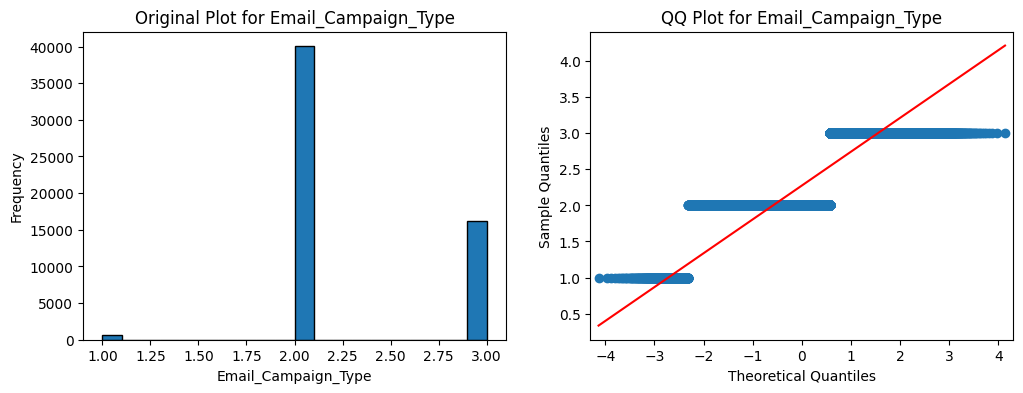

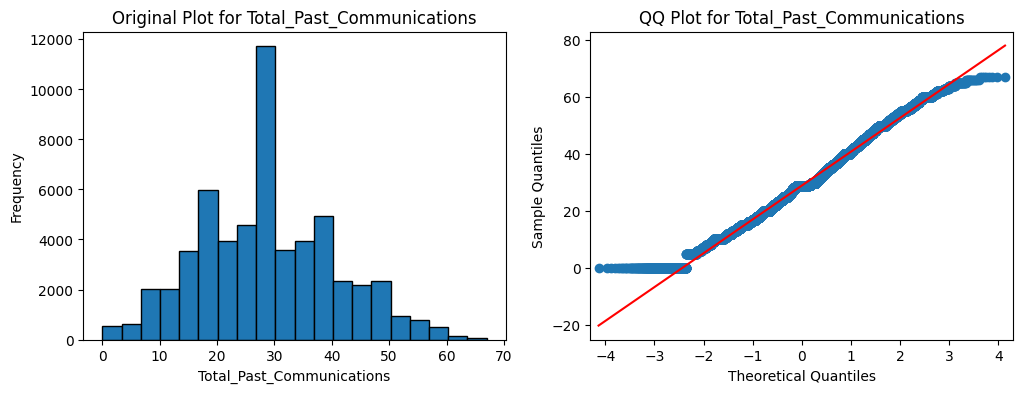

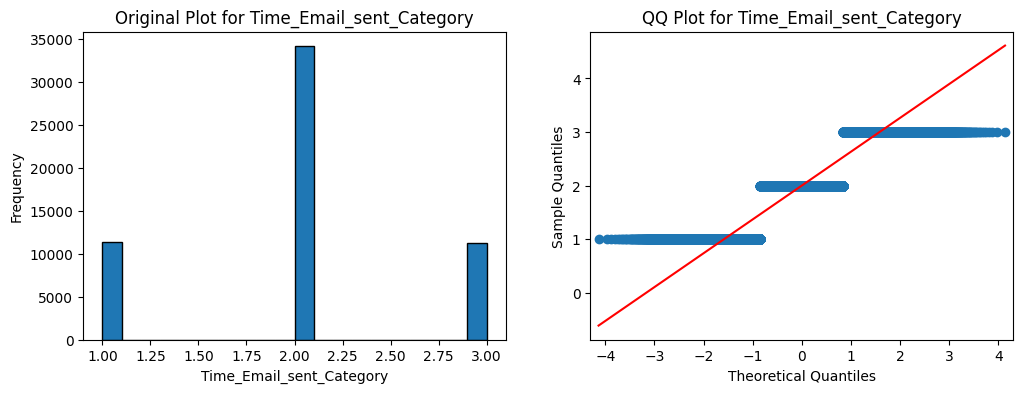

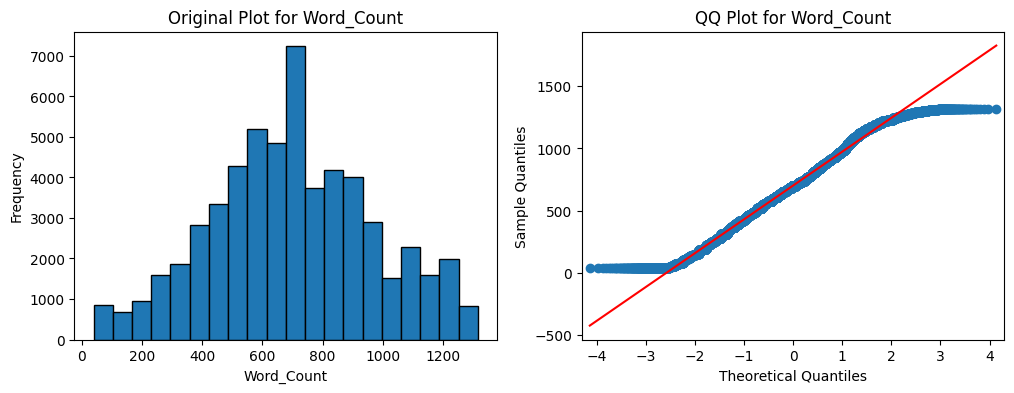

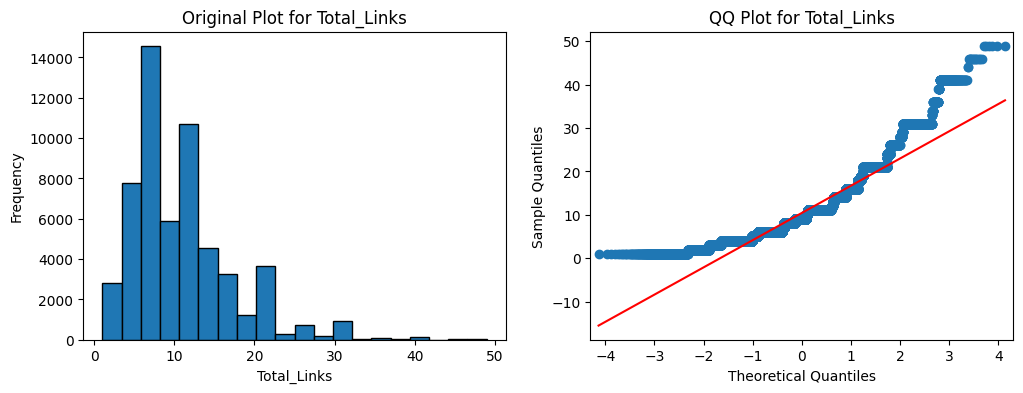

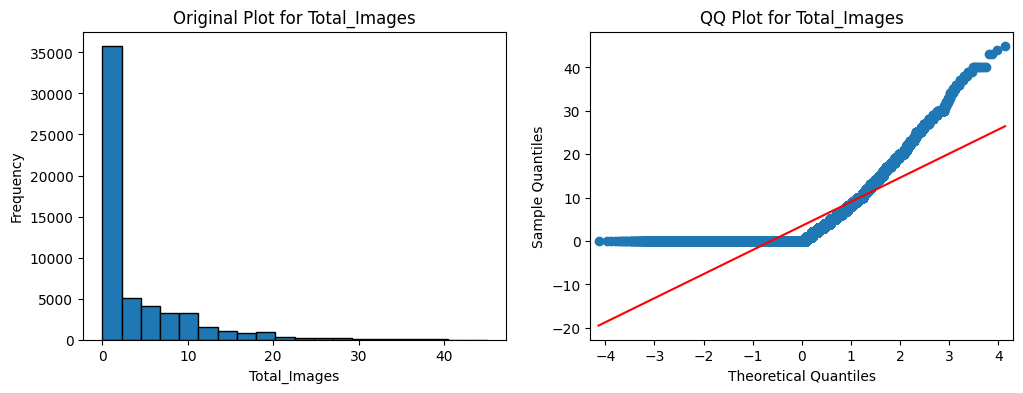

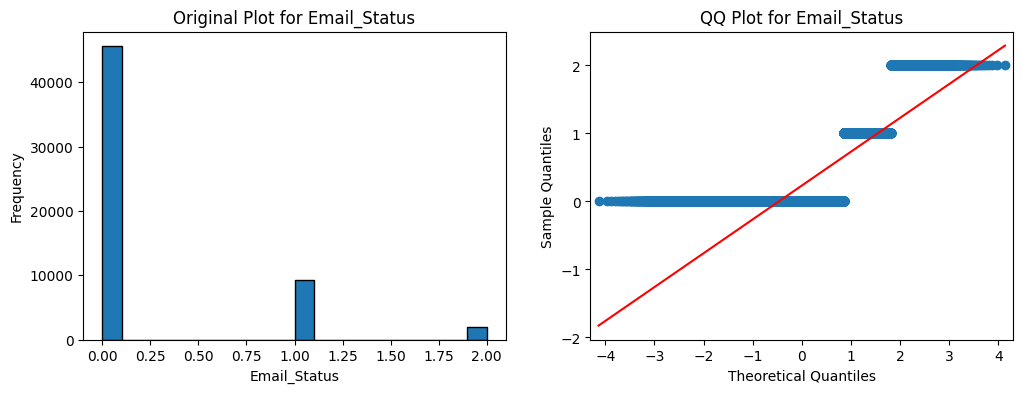

In [ ]:
import statsmodels.api as sm

def plot_original_and_qq_plots(dataframe):
    for column in dataframe.columns:
        if dataframe[column].dtype in ['int64', 'float64']:  # Check if the column contains numeric data
            fig, axs = plt.subplots(1, 2, figsize=(12, 4))

            axs[0].hist(dataframe[column], bins=20, edgecolor='black')
            axs[0].set_title(f'Original Plot for {column}')
            axs[0].set_xlabel(column)
            axs[0].set_ylabel('Frequency')

            sm.qqplot(dataframe[column], line='s', ax=axs[1])
            axs[1].set_title(f'QQ Plot for {column}')

            plt.show()
        else:
            print(f"Skipping {column} as it contains non-numeric data.")

# Assuming 'data' is your DataFrame
plot_original_and_qq_plots(data)


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

A statistical hypothesis test is a method of statistical inference used to decide whether the data at hand sufficiently support a particular hypothesis. More generally, hypothesis testing allows us to make probabilistic statements about population parameters. More informally, hypothesis testing is the processes of making decisions under uncertainty. Typically, hypothesis testing procedures involve a user selected tradeoff between false positives and false negatives.


1.   The first step is for the analyst to state the hypotheses.
2.   The second step is to formulate an analysis plan, which outlines how the data will be evaluated.
3.   The third step is to carry out the plan and analyze the sample data.
4.   The final step is to analyze the results and either reject the null hypothesis, or state that the null hypothesis is plausible, given the data.







### Hypothetical Statement - 1

Null Hypothesis (H0): The effectiveness of Gmail-based Email marketing strategies is not different from other strategies.

Alternate Hypothesis (H1): The effectiveness of Gmail-based Email marketing strategies is significantly higher than other strategies, particularly in converting prospective customers into leads for small to medium business owners.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Email_Campaign_Type'], data['Email_Status'])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

# Check significance
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


Chi-square value: 5539.132793079765
P-value: 0.0
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

The statistical test performed in the provided code is a Chi-Square Test of Independence (chi2_contingency). The test is used to determine whether there is a significant association between two categorical variables. In this case, the variables are 'Email Campaign Type' and 'Email Status.'

The obtained P-value is 0.0, which is less than the significance level (alpha = 0.05). As a result, the code concludes that there is enough evidence to reject the null hypothesis. The rejection of the null hypothesis suggests that there is a significant association between 'Email Campaign Type' and 'Email Status.'

##### Why did you choose the specific statistical test?

The choice of the Chi-Square Test was made based on the categorical nature of the variables and the objective to assess the association between the type of email campaign and the observed email status. The low P-value indicates a significant relationship between these variables.

### Hypothetical Statement - 2

#### 1. The time at which an email is sent (morning, afternoon, evening) has no effect on the likelihood of the email being read.

Null Hypothesis (H0): There is no significant association between the time an email is sent and the likelihood of it being read.
Alternate Hypothesis (H1): The time an email is sent has a significant effect on the likelihood of it being read.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table_time = pd.crosstab(data['Time_Email_sent_Category'], data['Email_Status'])

# Perform chi-square test
chi2_time, p_time, _, _ = chi2_contingency(contingency_table_time)

# Print the results
print(f"Chi-square value: {chi2_time}")
print(f"P-value: {p_time}")

# Check significance
alpha_time = 0.05
if p_time < alpha_time:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Chi-square value: 1.9412135307580094
P-value: 0.746570468955366
Fail to reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

The statistical test performed in the provided code is a Chi-Square Test of Independence (chi2_contingency). The test is used to determine whether there is a significant association between two categorical variables.

In result, the Chi-Square value is 1.94. This value is relatively small, suggesting that there is not a substantial difference between the observed and expected frequencies.Since the P-value (0.7465) is greater than the significance level (alpha = 0.05), you fail to reject the null hypothesis. This suggests that there is not enough evidence to conclude a significant association between the time an email is sent and the likelihood of it being read.

##### Why did you choose the specific statistical test?

The Chi-Square Test of Independence is chosen when dealing with categorical variables and assessing whether there is a significant association between them. In this case, it helps determine whether the distribution of email statuses is independent of the time the email is sent. The higher P-value indicates that there is not enough evidence to suggest a significant association in this context.

### Hypothetical Statement - 3

#### 1. The word count in an email does not impact whether the email is acknowledged.

Null Hypothesis (H0): There is no significant relationship between the word count in an email and the likelihood of it being acknowledged.
Alternate Hypothesis (H1): The word count in an email significantly influences the likelihood of it being acknowledged.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import f_oneway

# Perform one-way ANOVA (assuming word count is continuous)
f_stat, p_word_count = f_oneway(data[data['Email_Status'] == 0]['Word_Count'],
                                data[data['Email_Status'] == 1]['Word_Count'],
                                data[data['Email_Status'] == 2]['Word_Count'])

# Print the results
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_word_count}")

# Check significance
alpha_word_count = 0.05
if p_word_count < alpha_word_count:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

F-statistic: 1023.4140032442334
P-value: 0.0
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

The F-statistic is a measure of the variability between group means relative to the variability within groups. In the context of One-Way ANOVA, it assesses whether there are statistically significant differences in the means of the word count variable among the different email status groups.

Since the P-value is less than the significance level (alpha = 0.05), you reject the null hypothesis. This implies that there is strong evidence to suggest that the word count in an email has a statistically significant effect on the likelihood of it being acknowledged.

##### Why did you choose the specific statistical test?

As word count is a continuous variable, One-Way ANOVA is suitable for comparing means across multiple groups. It helps assess whether there are any significant differences in mean word counts across different email statuses.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

1. Calculate the Z-scores for each data point in the 'Subject Hotness Score' based on its deviation from the mean. Values with a Z-score beyond a certain threshold (e.g., 3) can be considered outliers.
2. Calculate the IQR for 'Subject Hotness Score' and identify outliers based on a multiplier of the IQR (e.g., 1.5 times the IQR).
3. Winsorizing : Replace extreme values with values closer to the mean or within a certain range.

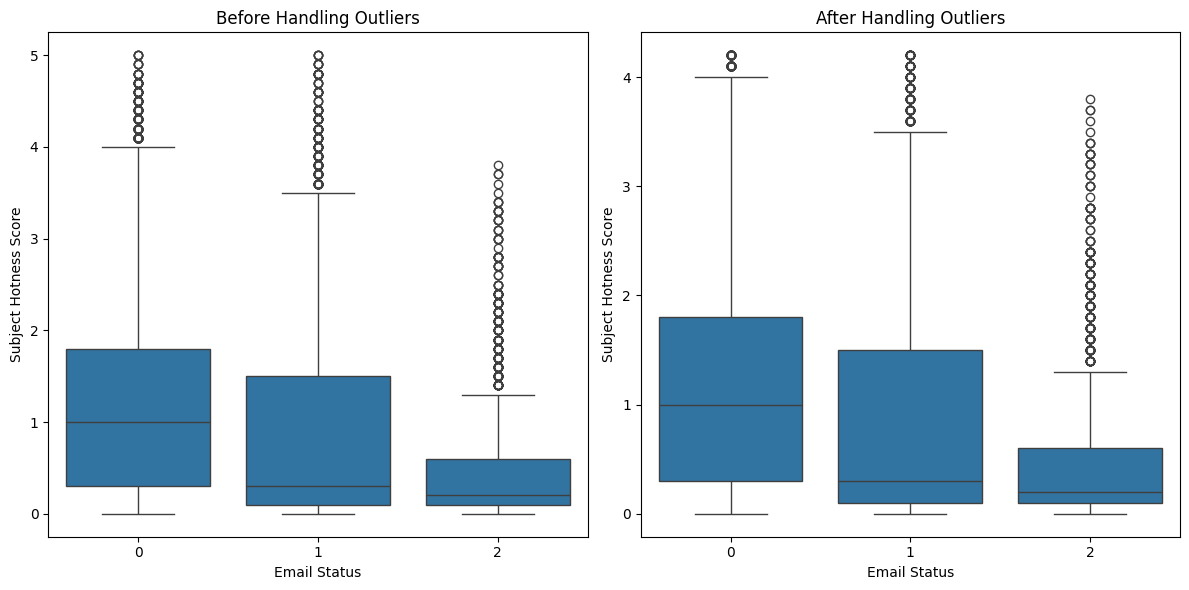

In [ ]:
# Before handling outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Email_Status', y='Subject_Hotness_Score')
plt.title('Before Handling Outliers')
plt.xlabel('Email Status')
plt.ylabel('Subject Hotness Score')
score_stats_before = data.groupby('Email_Status')['Subject_Hotness_Score'].describe()
# Calculate IQR
Q1 = data['Subject_Hotness_Score'].quantile(0.25)
Q3 = data['Subject_Hotness_Score'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (data['Subject_Hotness_Score'] < (Q1 - 1.5 * IQR)) | (data['Subject_Hotness_Score'] > (Q3 + 1.5 * IQR))

# Replace outliers with median
data.loc[outliers, 'Subject_Hotness_Score'] = data['Subject_Hotness_Score'].median()

# After handling outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Email_Status', y='Subject_Hotness_Score')
plt.title('After Handling Outliers')
plt.xlabel('Email Status')
plt.ylabel('Subject Hotness Score')

plt.tight_layout()
plt.show()
score_stats_after = data.groupby('Email_Status')['Subject_Hotness_Score'].describe()

In [ ]:
print("score_stats_before : ")
score_stats_before

score_stats_before : 


,count,mean,std,min,25%,50%,75%,max
Email_Status,,,,,,,,
0,45590.0,1.160145,0.987982,0.0,0.3,1.0,1.8,5.0
1,9191.0,0.905353,1.032402,0.0,0.1,0.3,1.5,5.0
2,1977.0,0.490794,0.671594,0.0,0.1,0.2,0.6,3.8


In [ ]:
print("score_stats_after : ")
score_stats_after

score_stats_after : 


,count,mean,std,min,25%,50%,75%,max
Email_Status,,,,,,,,
0,45590.0,1.149186,0.971195,0.0,0.3,1.0,1.8,4.2
1,9191.0,0.880644,0.988213,0.0,0.1,0.3,1.5,4.2
2,1977.0,0.490794,0.671594,0.0,0.1,0.2,0.6,3.8


These statistics provide a comparison of the central tendency and spread of the 'Subject_Hotness_Score' for each 'Email_Status' category before and after handling outliers. The changes in mean, standard deviation, and quartile values reflect the impact of the outlier-handling process on the distribution of this variable.

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have  used a common technique for handling outliers known as "Winsorizing," where extreme values are replaced with less extreme values. Specifically, you replaced the outliers with the median value of the 'Subject_Hotness_Score'. This is a simple and effective method to mitigate the impact of extreme values on statistical analyses.

Winsorizing (Replacing outliers with median):
*  Calculated the Interquartile Range (IQR).
*  Identified outliers based on the IQR method.
*  Replaced the identified outliers with the median value of 'Subject_Hotness_Score'.

The choice of using Winsorizing with the median is common when you want to handle extreme values without removing them entirely. This approach helps to maintain the overall shape of the distribution while mitigating the influence of outliers on summary statistics and visualizations.





### 2. Categorical Encoding

Email_ID - This column appears to be an identifier and does not contribute to the model's predictive power. It can be dropped.

Email_Source_Type,Customer_Location, Time_Email_sent_Category - These columns also contain categorical data and need encoding.

In [ ]:
data = data.drop(columns=['Email_ID'])

In [ ]:
data.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1,2.2,2,E,2,33.00000,1,440,8.0,0.0,0
2,2,0.1,1,B,3,36.00000,2,962,5.0,0.0,1
3,1,3.0,2,E,2,25.00000,2,610,16.0,0.0,0
4,1,0.0,2,C,3,18.00000,2,947,4.0,0.0,0
5,1,1.5,1,G,2,28.93325,2,416,11.0,0.0,0


In [ ]:
# For Email_Source_Type and Customer_Location => one-hot encoding
data = pd.get_dummies(data, columns=['Customer_Location'], drop_first=True)


In [ ]:
data.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status,Customer_Location_B,Customer_Location_C,Customer_Location_D,Customer_Location_E,Customer_Location_F,Customer_Location_G
0,1,2.2,2,2,33.00000,1,440,8.0,0.0,0,0,0,0,1,0,0
2,2,0.1,1,3,36.00000,2,962,5.0,0.0,1,1,0,0,0,0,0
3,1,3.0,2,2,25.00000,2,610,16.0,0.0,0,0,0,0,1,0,0
4,1,0.0,2,3,18.00000,2,947,4.0,0.0,0,0,1,0,0,0,0
5,1,1.5,1,2,28.93325,2,416,11.0,0.0,0,0,0,0,0,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

**One-Hot Encoding:**

Applied to: Email_Source_Type and Customer_Location
Why: One-hot encoding is suitable when the categorical variable does not have an ordinal relationship. It creates binary columns for each category, representing the presence or absence of that category. This technique is useful when there is no inherent order among the categories, and it prevents the model from assuming a false ordinal relationship.

**Label Encoding:**

Applied to: Time_Email_sent_Category
Why: Label encoding is appropriate when there is an ordinal relationship among the categories. It assigns numerical labels to each category based on their order. In this case, the 'Time_Email_sent_Category' column represents different times of the day, and there is a natural order (Morning < Afternoon < Evening). Label encoding preserves this order.

The choice between one-hot encoding and label encoding depends on the nature of the categorical variable and the assumptions you want to make in the model. Using one-hot encoding for non-ordinal categorical variables helps avoid implying a false order, while label encoding preserves ordinal relationships when they exist.

### 3. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

There is no explicit textual data column (like emails, messages, or text descriptions) that requires natural language processing (NLP) techniques.So there is no need of textual data preprocessing.

### 4. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['Subject_Hotness_Score', 'Word_Count', 'Total_Links', 'Total_Images', 'Total_Past_Communications']] = scaler.fit_transform(data[['Subject_Hotness_Score', 'Word_Count', 'Total_Links', 'Total_Images', 'Total_Past_Communications']])


##### Which method have you used to scale you data and why?

 Min-Max scaling transforms the data such that it falls within a specific range, typically [0, 1]. While Min-Max scaling is a good choice in many scenarios, the choice of scaling method depends on the characteristics of the data and the requirements of the specific machine learning algorithm being used.

## ***7. ML Model Implementation***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

model_dict = {"abc": AdaBoostClassifier(),
              "gbc": GradientBoostingClassifier(),
              "rfc": RandomForestClassifier()
             }

# Cross validation scores of the models
for key, val in model_dict.items():
    print(f"cross-validation for {key}")
    score = cross_val_score(val, X, y, cv=2, scoring='neg_mean_squared_error')
    rmses = np.sqrt(-score)
    print(rmses)
    print(f"Mean RMSE: {np.mean(rmses)}")


cross-validation for abc
[16.75594062 14.31169765]
Mean RMSE: 15.533819136410866
cross-validation for gbc
[7.43355275 6.73915985]
Mean RMSE: 7.086356296615154
cross-validation for rfc
[8.02681616 8.16869798]
Mean RMSE: 8.097757070583613


### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = data.drop('Email_Status', axis=1)
y = data['Email_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy: 0.8011804087385482
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89      9095
           1       0.42      0.16      0.23      1844
           2       0.19      0.01      0.03       413

    accuracy                           0.80     11352
   macro avg       0.48      0.38      0.38     11352
weighted avg       0.74      0.80      0.75     11352

Confusion Matrix:
 [[8797  288   10]
 [1536  292   16]
 [ 296  111    6]]


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Perform cross-validation and print the mean accuracy
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Mean Accuracy:", np.mean(cv_scores))

Cross-Validation Mean Accuracy: 0.8062299788993268


In [ ]:
from sklearn.model_selection import GridSearchCV

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the optimized model
optimized_predictions = best_model.predict(X_test)
print("Optimized Model Accuracy:", accuracy_score(y_test, optimized_predictions))



Optimized Model Accuracy: 0.8087561663143058


##### Which hyperparameter optimization technique have you used and why?

Grid Search is a hyperparameter optimization technique that systematically evaluates a predefined set of hyperparameter combinations to find the best-performing model.
It works by creating a grid of hyperparameter values and exhaustively searching through all possible combinations.
Cross-Validation is employed during this process to ensure a more robust evaluation of the model's performance by using multiple train-test splits.

**Reasons for Using Grid Search:**

Comprehensive Search: Grid Search explores a predefined set of hyperparameter values for each hyperparameter, covering a wide range of possibilities. This exhaustive search helps identify the combination that results in the best model performance.

Easy to Implement: Grid Search is straightforward to implement, making it a good starting point for hyperparameter tuning.

Robust Evaluation: By incorporating Cross-Validation, Grid Search provides a more reliable estimate of the model's performance, reducing the risk of overfitting to a specific train-test split.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The accuracy of the optimized model is 0.8087, which is slightly higher than the initial accuracy of 0.8019. While there is an improvement, it's not a significant increase.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the training data for training and validation
X_train, X_val, train_targets, val_targets = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual models
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_svc = SVC(probability=True, random_state=42)
model_knn = KNeighborsClassifier()
model_dt = DecisionTreeClassifier(random_state=42)

# Train individual models
model_rf.fit(X_train, train_targets)
model_gb.fit(X_train, train_targets)
model_lr.fit(X_train, train_targets)
model_svc.fit(X_train, train_targets)
model_knn.fit(X_train, train_targets)
model_dt.fit(X_train, train_targets)

# Make predictions on validation set
pred_rf = model_rf.predict(X_val)
pred_gb = model_gb.predict(X_val)
pred_lr = model_lr.predict(X_val)
pred_svc = model_svc.predict(X_val)
pred_knn = model_knn.predict(X_val)
pred_dt = model_dt.predict(X_val)

# Create a voting classifier using soft voting
voting_classifier = VotingClassifier(
    estimators=[('rf', model_rf), ('gb', model_gb), ('lr', model_lr),
                ('svc', model_svc), ('knn', model_knn), ('dt', model_dt)],
    voting='soft'
)

# Train the voting classifier
voting_classifier.fit(X_train, train_targets)

# Make predictions on validation set using the ensemble
ensemble_preds = voting_classifier.predict(X_val)

# Evaluate the ensemble performance
ensemble_accuracy = accuracy_score(val_targets, ensemble_preds)
print(f'Ensemble Accuracy: {ensemble_accuracy:.2f}')


Ensemble Accuracy: 0.81


In [ ]:
# Calculate and print individual accuracies
accuracy_rf = accuracy_score(val_targets, pred_rf)
accuracy_gb = accuracy_score(val_targets, pred_gb)
accuracy_lr = accuracy_score(val_targets, pred_lr)
accuracy_svc = accuracy_score(val_targets, pred_svc)
accuracy_knn = accuracy_score(val_targets, pred_knn)
accuracy_dt = accuracy_score(val_targets, pred_dt)

print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Gradient Boosting Accuracy: {accuracy_gb:.2f}')
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
print(f'SVM Accuracy: {accuracy_svc:.2f}')
print(f'KNN Accuracy: {accuracy_knn:.2f}')
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

Random Forest Accuracy: 0.80
Gradient Boosting Accuracy: 0.81
Logistic Regression Accuracy: 0.80
SVM Accuracy: 0.81
KNN Accuracy: 0.79
Decision Tree Accuracy: 0.71


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification

# Assuming you have X_train, X_val, train_targets, and val_targets defined earlier

# Generate synthetic classification data for demonstration
# X_train, X_val, train_targets, val_targets = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Define individual classification models
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)
clf_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf_ab = AdaBoostClassifier(n_estimators=100, random_state=42)
clf_xgb = XGBClassifier(random_state=42, n_jobs=-1)
clf_lgbm = LGBMClassifier(random_state=42, n_jobs=-1)

# Define lists for ensemble models and model names
ensemble_models = [clf_rf, clf_gb, clf_ab, clf_xgb, clf_lgbm]
ensemble_model_names = ['random_forest', 'gradient_boosting', 'adaboost', 'xgboost', 'lightgbm']

# Define score dictionaries for each model
rf_scores, gb_scores, ab_scores, xgb_scores, lgbm_scores,trained_models = {}, {}, {}, {}, {}, {}
score_dicts = [rf_scores, gb_scores, ab_scores, xgb_scores, lgbm_scores]

def try_ensemble_classification(model_name, model, score_dict):
    model.fit(X_train, train_targets.values.ravel())

    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Training prediction scores
    train_accuracy = accuracy_score(train_targets, train_preds)
    train_precision = precision_score(train_targets, train_preds, average='weighted')
    train_recall = recall_score(train_targets, train_preds, average='weighted')
    train_f1 = f1_score(train_targets, train_preds, average='weighted')


    # Validation prediction scores
    val_accuracy = accuracy_score(val_targets, val_preds)
    val_precision = precision_score(val_targets, val_preds, average='weighted')
    val_recall = recall_score(val_targets, val_preds, average='weighted')
    val_f1 = f1_score(val_targets, val_preds, average='weighted')

    score_dict['accuracy'] = {'training': round(train_accuracy, 2), 'validation': round(val_accuracy, 2)}
    score_dict['precision'] = {'training': round(train_precision, 2), 'validation': round(val_precision, 2)}
    score_dict['recall'] = {'training': round(train_recall, 2), 'validation': round(val_recall, 2)}
    score_dict['f1'] = {'training': round(train_f1, 2), 'validation': round(val_f1, 2)}

    trained_models[model_name] = model
    return val_accuracy, val_precision, val_recall, val_f1

# Iterate through ensemble models
for i in range(5):
    val_accuracy, val_precision, val_recall, val_f1 = try_ensemble_classification(ensemble_model_names[i], ensemble_models[i], score_dicts[i])
    print("*********")
    print(ensemble_model_names[i])
    print("Val Accuracy: ", val_accuracy)
    print("Val Precision: ", val_precision)
    print("Val Recall: ", val_recall)
    print("Val F1: ", val_f1)


*********
random_forest
Val Accuracy:  0.8011804087385482
Val Precision:  0.7385540660051793
Val Recall:  0.8011804087385482
Val F1:  0.753063482891345
*********
gradient_boosting
Val Accuracy:  0.8128964059196617
Val Precision:  0.7721263460530917
Val Recall:  0.8128964059196617
Val F1:  0.7578597456425088


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*********
adaboost
Val Accuracy:  0.8083157152924595
Val Precision:  0.7392910813726502
Val Recall:  0.8083157152924595
Val F1:  0.7522173227672694
*********
xgboost
Val Accuracy:  0.8062896405919662
Val Precision:  0.7566453698966812
Val Recall:  0.8062896405919662
Val F1:  0.7620873473073949
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 528
[LightGBM] [Info] Number of data points in the train set: 45406, number of used features: 15
[LightGBM] [Info] Start training from score -0.218469
[LightGBM] [Info] Start training from score -1.821352
[LightGBM] [Info] Start training from score -3.368398
*********
lightgbm
Val Accuracy:  0.8119274136715997
Val Precision:  0.7610294559969577
Val Recall:  0.8119274136715997
Val F1:  0.760710499376166


In [ ]:
print("Random Forest scores")
display(pd.DataFrame(rf_scores))
print("XGBoost Scores")
display(pd.DataFrame(xgb_scores))
print("LightGBM Scores")
display(pd.DataFrame(lgbm_scores))
print("Gradient Boosting Scores")
display(pd.DataFrame(gb_scores))
print("AdaBoost Scores")
display(pd.DataFrame(ab_scores))


Random Forest scores


,accuracy,precision,recall,f1
training,1.0,1.00,1.0,1.00
validation,0.8,0.74,0.8,0.75


XGBoost Scores


,accuracy,precision,recall,f1
training,0.85,0.84,0.85,0.81
validation,0.81,0.76,0.81,0.76


LightGBM Scores


,accuracy,precision,recall,f1
training,0.83,0.80,0.83,0.78
validation,0.81,0.76,0.81,0.76


Gradient Boosting Scores


,accuracy,precision,recall,f1
training,0.82,0.78,0.82,0.77
validation,0.81,0.77,0.81,0.76


AdaBoost Scores


,accuracy,precision,recall,f1
training,0.81,0.75,0.81,0.76
validation,0.81,0.74,0.81,0.75


In [ ]:
rf = trained_models['random_forest']
xgb = trained_models['xgboost']
lgbm = trained_models['lightgbm']

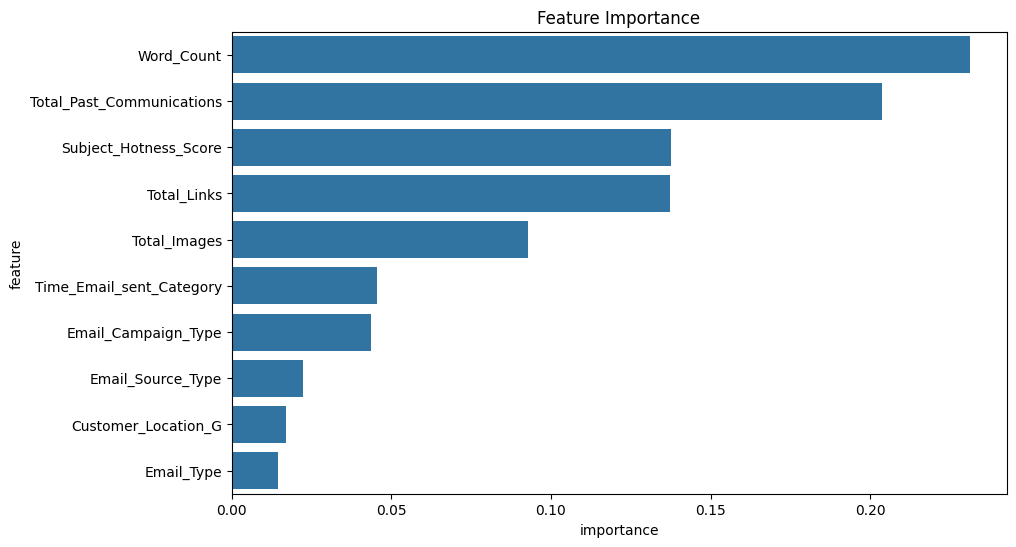

In [ ]:
rf_imp_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=rf_imp_df.head(10), x='importance', y='feature');

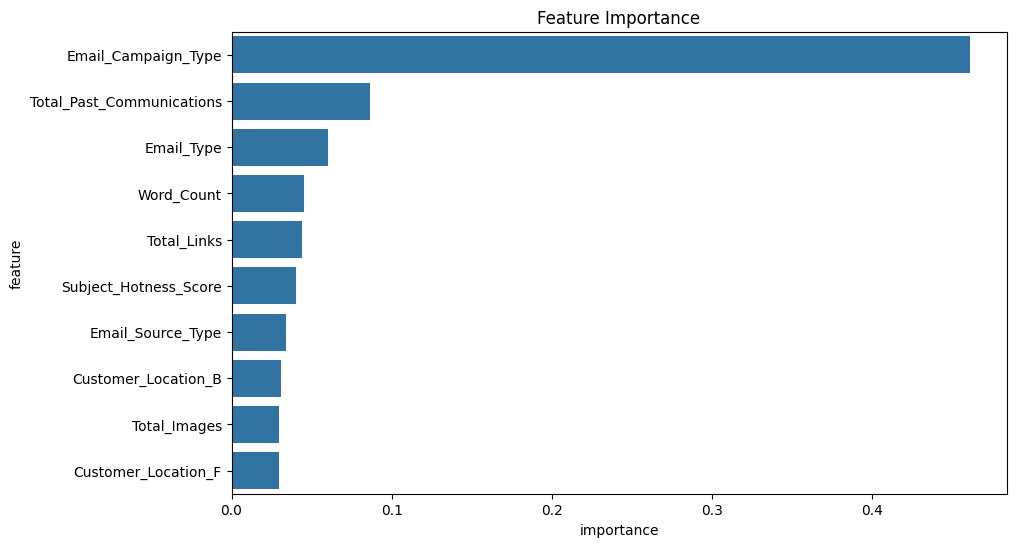

In [ ]:
xgb_imp_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=xgb_imp_df.head(10), x='importance', y='feature');

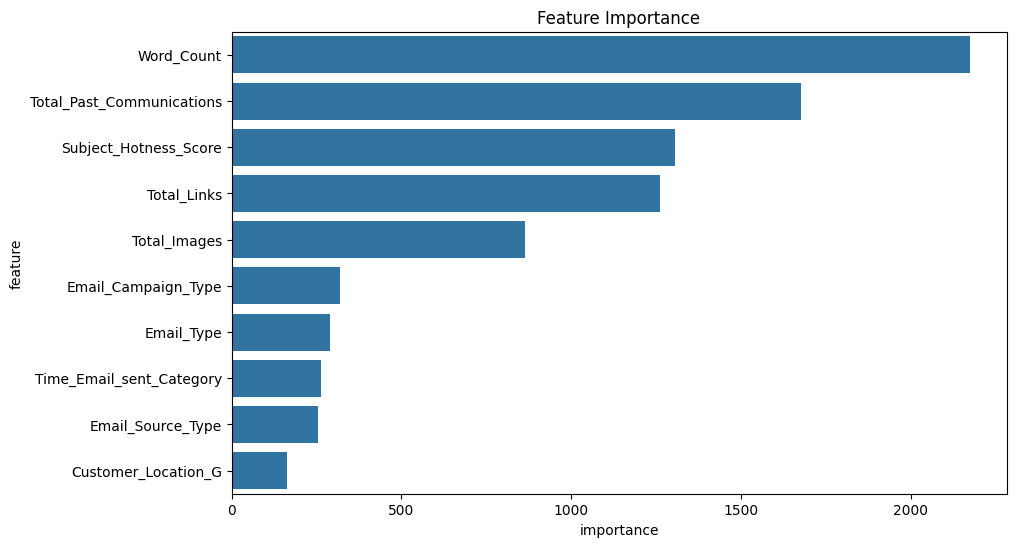

In [ ]:
lgbm_imp_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgbm.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=lgbm_imp_df.head(10), x='importance', y='feature');

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

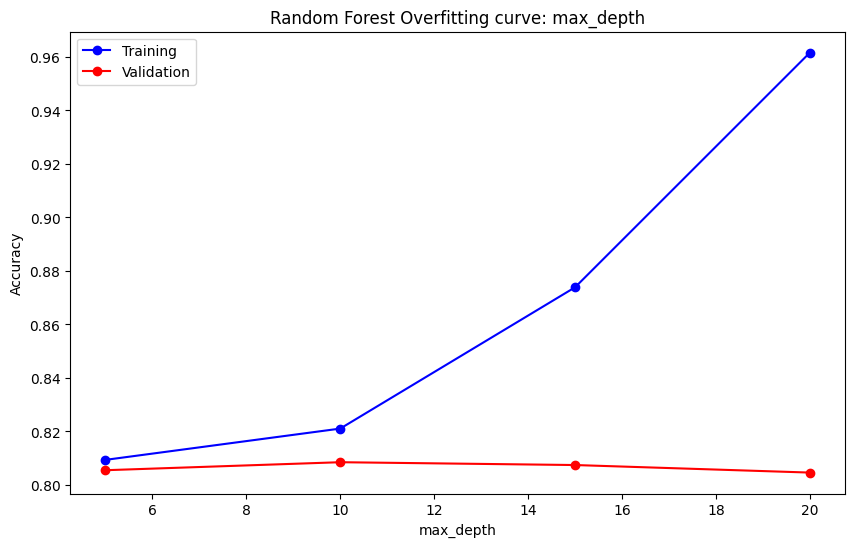

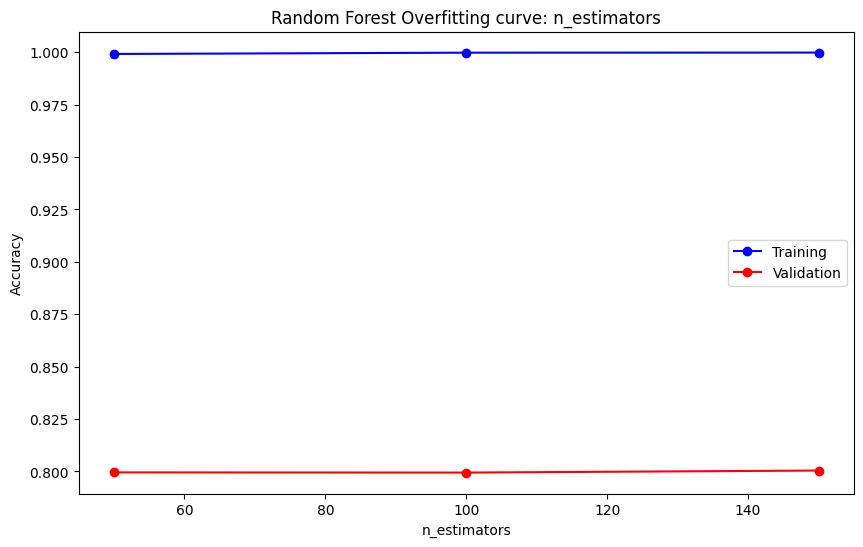

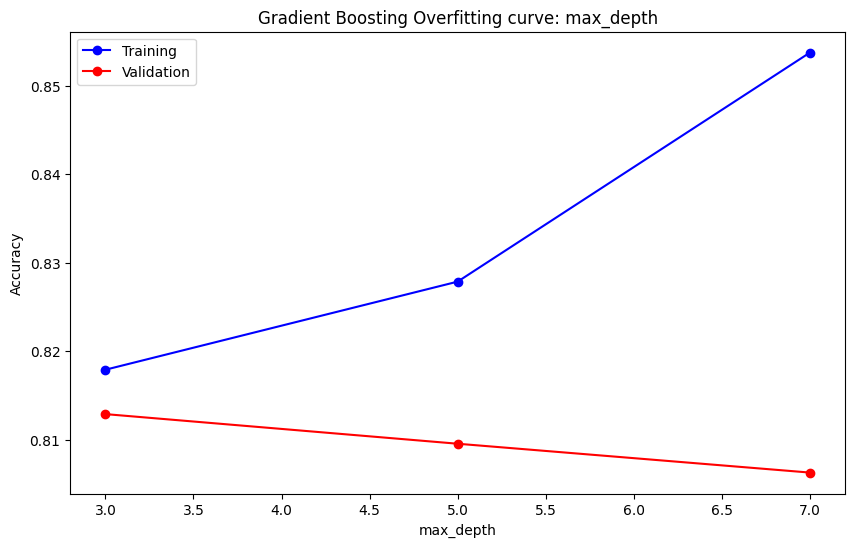

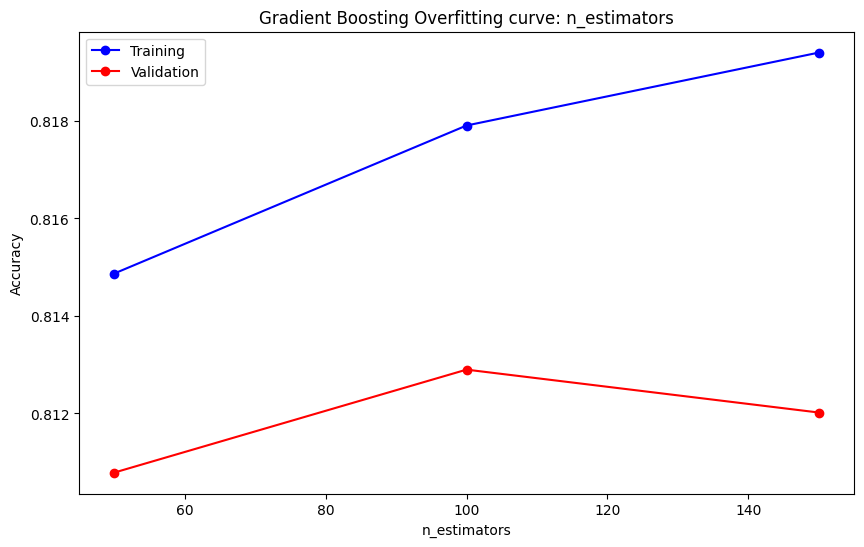

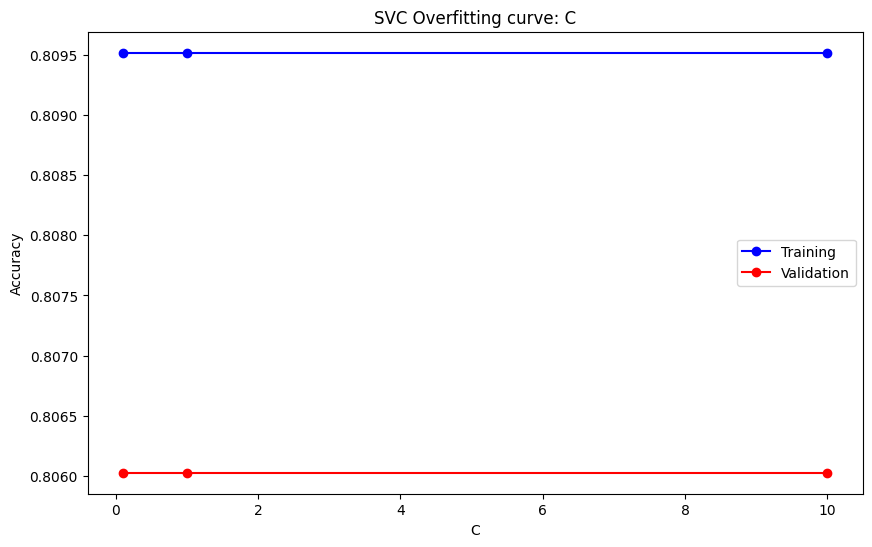

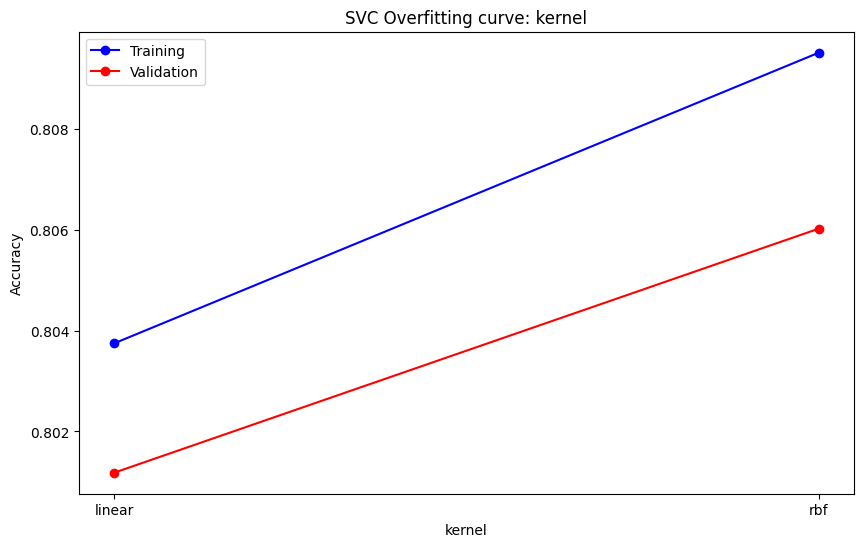

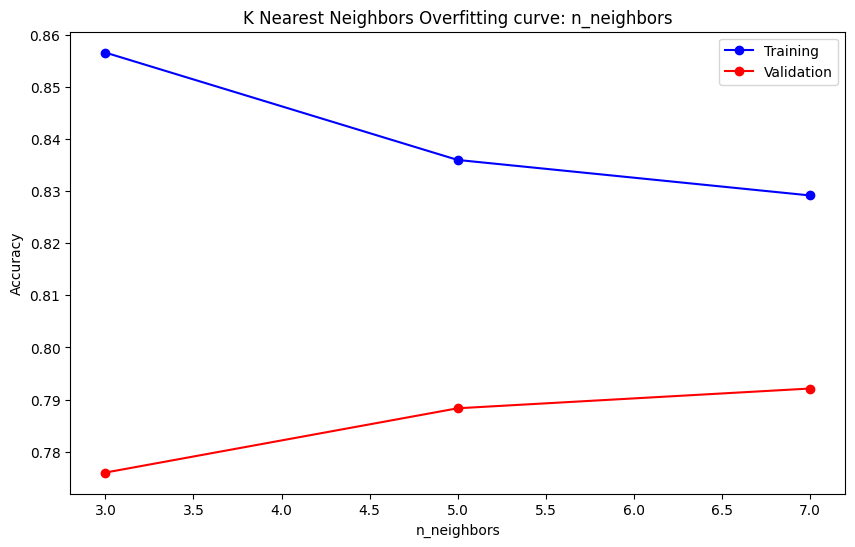

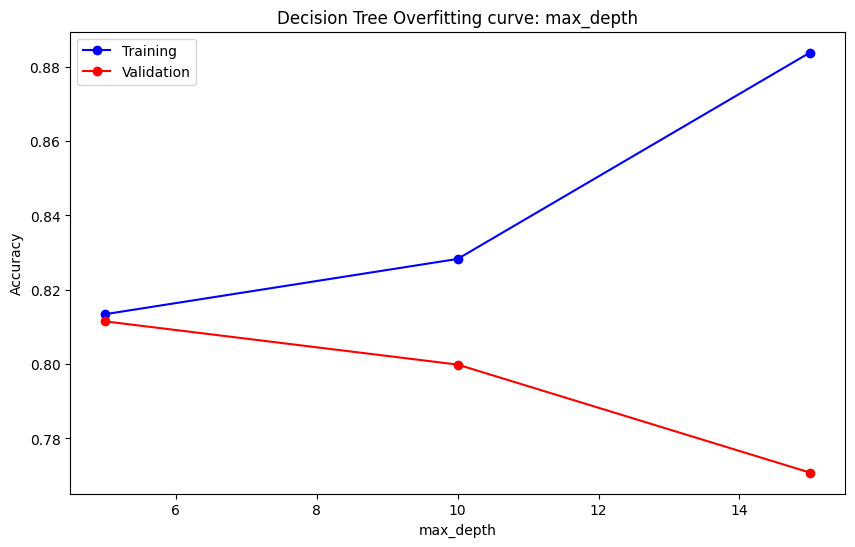

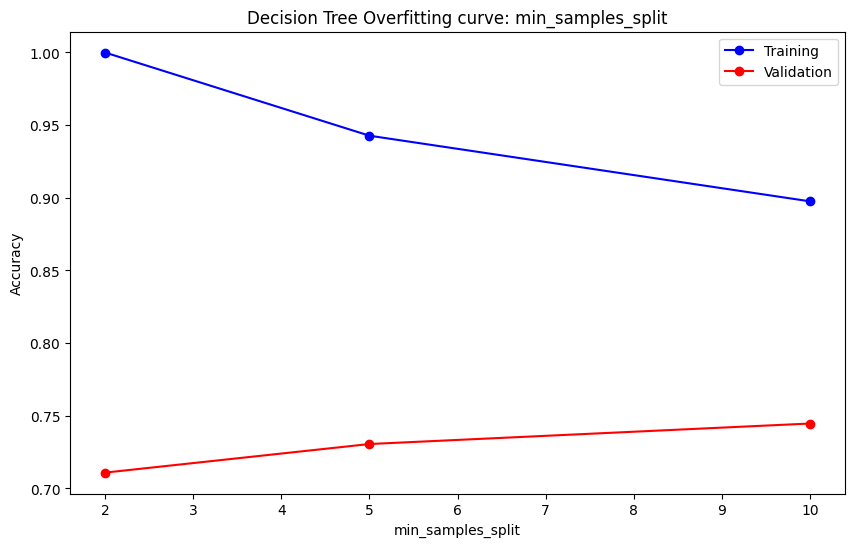

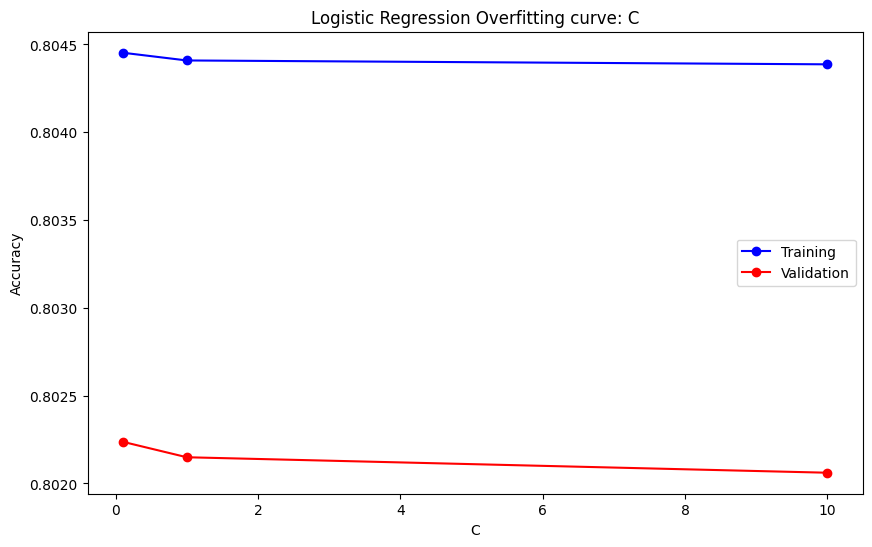

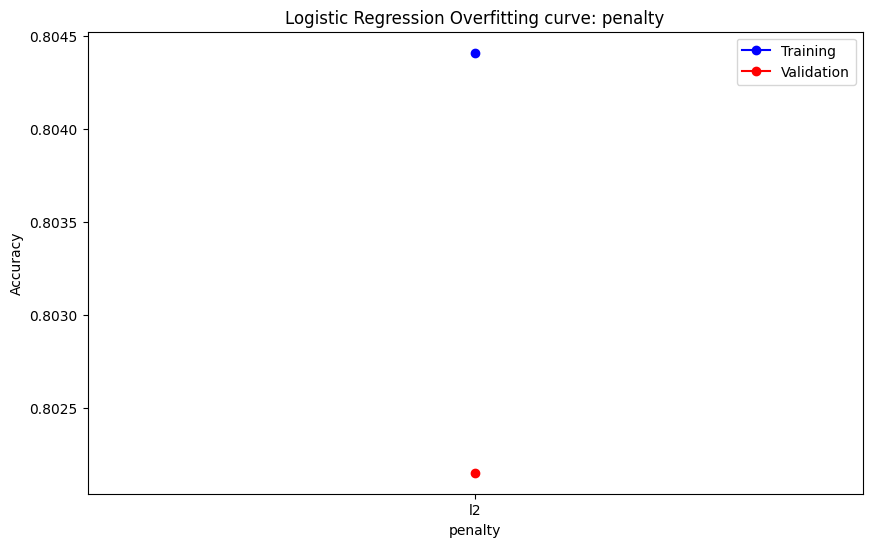

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Assuming you have X_train, X_val, train_targets, and val_targets defined previously

def test_classification_params(model, **params):
    model_instance = model(**params)
    model_instance.fit(X_train, train_targets)
    train_accuracy = accuracy_score(train_targets, model_instance.predict(X_train))
    val_accuracy = accuracy_score(val_targets, model_instance.predict(X_val))
    return train_accuracy, val_accuracy

def test_classification_param_and_plot(model_name, model, param_name, param_values):
    train_accuracies, val_accuracies = [], []
    accuracy_results = {}

    for value in param_values:
        params = {param_name: value}
        train_accuracy, val_accuracy = test_classification_params(model, **params)

        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

    plt.figure(figsize=(10, 6))
    plt.title(model_name + ' Overfitting curve: ' + param_name)
    plt.plot(param_values, train_accuracies, 'b-o', label='Training')
    plt.plot(param_values, val_accuracies, 'r-o', label='Validation')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend()

    accuracy_results[param_name] = {
        'train_accuracy': train_accuracies,
        'val_accuracy': val_accuracies
    }

    return accuracy_results

# List of models and their hyperparameters
models = [
    ('Random Forest', RandomForestClassifier, {'max_depth': [5, 10, 15, 20], 'n_estimators': [50, 100, 150]}),
    ('Gradient Boosting', GradientBoostingClassifier, {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150]}),
    ('SVC', SVC, {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    ('K Nearest Neighbors', KNeighborsClassifier, {'n_neighbors': [3, 5, 7]}),
    ('Decision Tree', DecisionTreeClassifier, {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}),
    ('Logistic Regression', LogisticRegression, {'C': [0.1, 1, 10], 'penalty': ['l2']})
]

# Iterate through models
for model_name, model, hyperparameters in models:
    for param_name, param_values in hyperparameters.items():
        results = test_classification_param_and_plot(model_name, model, param_name, param_values)

plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

A. XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2]
}

model = XGBClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train, train_targets)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
val_predictions = best_model.predict(X_val)

val_accuracy = accuracy_score(val_targets, val_predictions)
val_precision = precision_score(val_targets, val_predictions, average='weighted')
val_recall = recall_score(val_targets, val_predictions, average='weighted')
val_f1 = f1_score(val_targets, val_predictions, average='weighted')

print("Validation Scores:")
print(f"Accuracy: {val_accuracy:.2f}")
print(f"Precision: {val_precision:.2f}")
print(f"Recall: {val_recall:.2f}")
print(f"F1 Score: {val_f1:.2f}")


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
Validation Scores:
Accuracy: 0.81
Precision: 0.77
Recall: 0.81
F1 Score: 0.76


B. Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
val_predictions = best_model.predict(X_val)

val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions, average='weighted')
val_recall = recall_score(y_val, val_predictions, average='weighted')
val_f1 = f1_score(y_val, val_predictions, average='weighted')

print("Validation Scores:")
print(f"Accuracy: {val_accuracy:.2f}")
print(f"Precision: {val_precision:.2f}")
print(f"Recall: {val_recall:.2f}")
print(f"F1 Score: {val_f1:.2f}")


C. SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
val_predictions = best_model.predict(X_val)

val_accuracy = accuracy_score(y_val, val_predictions)
val_precision = precision_score(y_val, val_predictions, average='weighted')
val_recall = recall_score(y_val, val_predictions, average='weighted')
val_f1 = f1_score(y_val, val_predictions, average='weighted')

print("Validation Scores:")
print(f"Accuracy: {val_accuracy:.2f}")
print(f"Precision: {val_precision:.2f}")
print(f"Recall: {val_recall:.2f}")
print(f"F1 Score: {val_f1:.2f}")


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV performs an exhaustive search over a specified parameter grid, trying all possible combinations of hyperparameter values. This method is suitable when the hyperparameter space is reasonably small and the computational resources are sufficient to evaluate all combinations.

The reason for using GridSearchCV is its simplicity and comprehensiveness. It systematically explores the hyperparameter space, allowing you to find the combination that yields the best performance based on a specified scoring metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***